<div align="center">
    <h1>Statistical Foundations of Machine Learning
        Project 2024 - 2025</h3>
</div>      

<div align="center">
    <h3>Muhammad Ehsan Siddique, Jordan Matin, Oussama Laakel</h3>
</div

### Table of Contents

1. [Introduction](#Introduction)
2. [Dataset Overview](#Dataset-Overview)
3. [Task](#Task)
4. [Performance Metrics](#Performance-Metrics)
5. [Preprocessing](#Preprocessing)
   - [Signal Normalization](#Signal-Normalization)
   - [Feature Extraction](#Feature-Extraction)
   - [PCA](#pca)
6. [Baseline Approaches](#Baseline-Approaches)
   - [Support Vector Regressor (SVR)](#Guided-Gestures)
   - [Random Forest Regressor](#Free-Gestures)
   - [Discussion Section](#discussion-baseline)
7. [More Sophisticated Approach](#neural-network)
   - [CNN-LSTM](#cnn-lstm)
   - [MLP-Wavelet co-efficient](#mlp-wavelet)
   - [Discussion Section](#discussion-nn)
8. [Ensemble Strategies](#Ensemble-Strategies)
   - [Meta](#Averaging)
   - [Averaging](#Stacking) 
   - [Bias–Variance Trade-Off Analysis](#bias) 
   - [Discussion Section](#discussion-ensemble) 
9. [Results and Discussion](#Results-and-Discussion)
10. [Link to the Visualization](#visualization)

## [Introduction](#Introduction)


Understanding how our muscles move and control our hands is important in many fields, such as prosthetics, rehabilitation, and human-computer interaction. In this project, we aim to predict hand joint angles (also called degrees of freedom or DoFs) using electrical signals from muscles, known as surface Electromyography (sEMG).

The data is collected from sensors placed on the skin that measure muscle activity (sEMG), and a motion capture system records the actual movements of the hand joints. The goal is to build a machine learning model that can accurately predict the positions of 51 hand joints from the sEMG signals. This is a challenging task because the relationship between muscle signals and hand movement is complex and can vary across individuals and time.

## [Dataset Overview](#dataset-overview)


This project involves two datasets—Guided Gestures and Free Gestures—each containing multichannel surface electromyography (sEMG) signals recorded from a participant performing hand and finger movements. The goal is to predict 51 hand joint angles from the raw sEMG data.

🔹 Guided Gestures Dataset
This dataset includes structured and repetitive hand movements, ideal for model development and baseline evaluation.

- guided_dataset_X.npy: sEMG training data of shape (5, 8, 230000)
→ 5 sessions × 8 electrodes × 230,000 time samples

- guided_dataset_y.npy: Corresponding joint angle labels of shape (5, 51, 230000)
→ 5 sessions × 51 joint angles × 230,000 samples

- guided_testset_X.npy: Test data in shape (5, 332, 8, 500)
→ 5 sessions × 332 windows × 8 electrodes × 500 time samples
→ Predict 51 joint angles for each window (total: 5 × 332 = 1660 predictions)

🔹 Free Gestures Dataset
This dataset captures realistic, unstructured hand motions, making it more challenging and closer to real-world conditions.

- freemoves_dataset_X.npy: sEMG training data of shape (5, 8, 270000)

- freemoves_dataset_y.npy: Joint angle labels of shape (5, 51, 270000)

- freemoves_testset_X.npy: Test data of shape (5, 308, 8, 500)
→ Predict 51 joint angles for each of the 1540 (5 × 308) windows




##  [Task](#Task)

🔹 Signal Filtering (Optional)

🔹 Dataset preparation and augmentation through overlapping windows

🔹 Cross-validation strategy

🔹 Baseline approach

🔹 More sophisticated approach

🔹 Ensembling Strategies 

🔹 Final Prediction and Submission 



## [Performance Metrics](#Performance-Metrics)

To evaluate the quality of our predictions on a given test set, we use the following metrics:

---

### **Root Mean Squared Error (RMSE)**

As defined in the challenge description, RMSE is given by:

$$
\text{RMSE} = \sqrt{\frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} (y_i - \hat{y}_i)^2}
$$


Where:  
- $N_{ts}$ is the number of test observations  
- $y_i$ is the measured concentration of the $i^{\text{th}}$ test observation  
- $\hat{y}_i$ is the predicted concentration of the $i^{\text{th}}$ test observation



## Import Libraries 

In [3]:
import numpy as np 
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pywt
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from tqdm import tqdm
import scipy.stats
from scipy.stats import entropy as scipy_entropy
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import LeaveOneGroupOut
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace

## [Preprocessing](#Preprocessing) 📊

Implementing a data preprocessing pieline involves several steps:

 * noise filtering
 
 * windows overlapping and normalization
 
 * feature engineering
 
 * feature selection
 
Moreover, as emphasized in the instructions, we need to illustrate and justify our strategy with appropriated graphs.

### Load the Data

All analyses will be done on the training set only, or else we will suffer from data leakage when testing the efficiency of our model.



loading the guided gestures dataset

In [ ]:
data_X = np.load(r"C:\Users\matin\Downloads\F422 EMG project data\guided\guided_dataset_X.npy")
data_Y =  np.load(r"C:\Users\matin\Downloads\F422 EMG project data\guided\guided_dataset_Y.npy")
#ata_X = np.load(r"data/guided/guided_dataset_X.npy")

#data_Y = np.load(r"data/guided/guided_dataset_Y.npy")
#
data_T = np.load(r"C:\Users\matin\Downloads\F422 EMG project data\guided\guided_dataset_y.npy")

#print("Guided Dataset X", data_X)
print("Guided Dataset Y", data_X[0])

print("Shape of Guided Dataset X :", data_X.shape)
print("Shape of Guided Dataset y :", data_Y.shape)

Guided Dataset Y [[   1.44750255   11.44884926   10.96660197 ...  -22.93242336
   -21.72570544   -7.65323851]
 [  -2.51984184  -27.13716915  -25.66957507 ...  -63.51726696
   -90.84048287 -130.08522851]
 [  -3.43154776   13.04230939   30.18778912 ...  -66.2548037
   -25.41721285   14.15463125]
 ...
 [  -6.1280614    -8.28674783   -0.59649155 ...   26.49171167
     6.79468467   -4.41795844]
 [   6.58512385   -6.81869229    8.88339399 ...   28.15838739
    -3.93034395    1.29360119]
 [   8.03271333   14.30733642    8.02125107 ...  -24.54067981
   -17.17460447  -24.10335111]]
Shape of Guided Dataset X : (5, 8, 230000)
Shape of Guided Dataset y : (5, 51, 230000)


loading the free gestures dataset

In [9]:
#data_X_free = np.load(r"data/freemoves/freemoves_dataset_X.npy")

#data_Y_free = np.load(r"data/freemoves/freemoves_dataset_Y.npy")
#data_T_free = np.load(r"data/freemoves/freemoves_testset_X.npy")

#print("Guided Dataset X", data_X)

data_X_free = np.load(r"C:\Users\matin\Downloads\F422 EMG project data\freemoves\freemoves_dataset_X.npy")
data_Y_free =  np.load(r"C:\Users\matin\Downloads\F422 EMG project data\freemoves\freemoves_dataset_Y.npy")
print("Freemoves Dataset Y", data_X_free[0])

print("Shape of Freemoves Dataset X :", data_X_free.shape)
print("Shape of Freemoves Dataset y :", data_Y_free.shape)

Freemoves Dataset Y [[ -15.3913786    -8.19904104  -21.92809893 ...  -49.31377931
    10.61033365  130.89938423]
 [ 164.99841871  103.66951992   -3.70750184 ...  237.41971581
   -94.86452941 -680.68959765]
 [ -92.88228431 -103.53878215  -64.28829799 ... -347.28704291
  -173.44546731  255.49382252]
 ...
 [   2.40463343    8.36822717   19.84418387 ...  146.4547285
   153.11112262  163.34315654]
 [ -14.60832618   17.36523684   23.13164907 ...  -17.24867609
    19.01459784   48.88482036]
 [   1.11662517   -4.23477741   -4.77848396 ...  -67.08249491
   -71.9908821   -65.69581092]]
Shape of Freemoves Dataset X : (5, 8, 270000)
Shape of Freemoves Dataset y : (5, 51, 270000)


### Dataset Overview

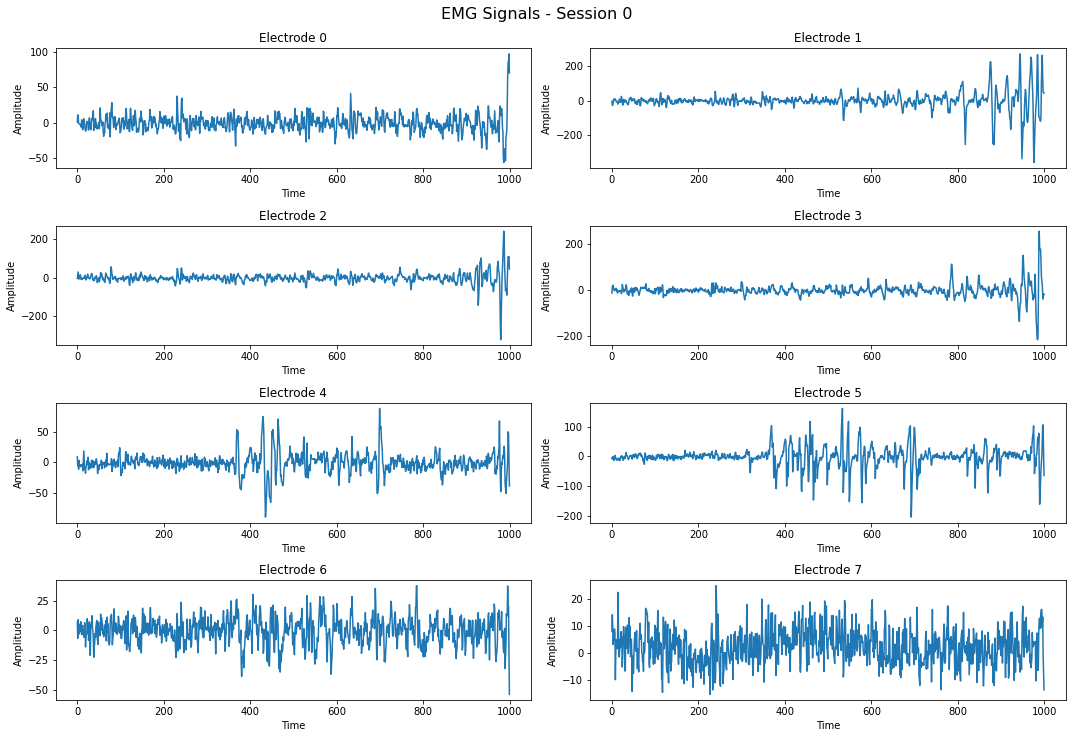

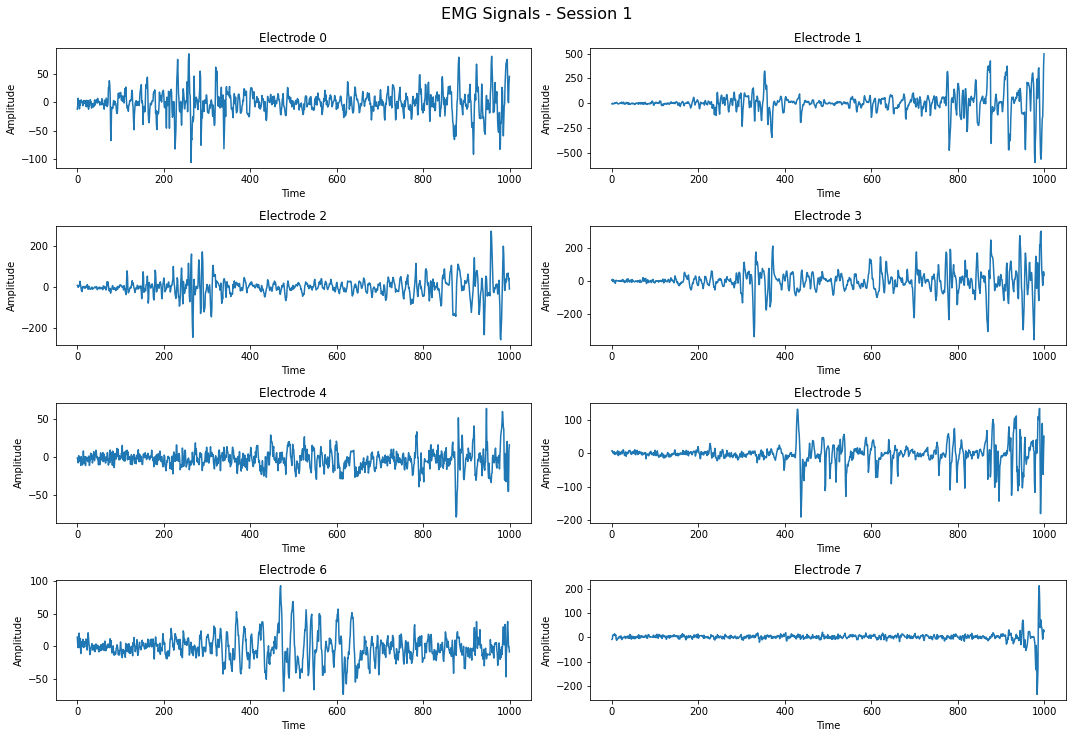

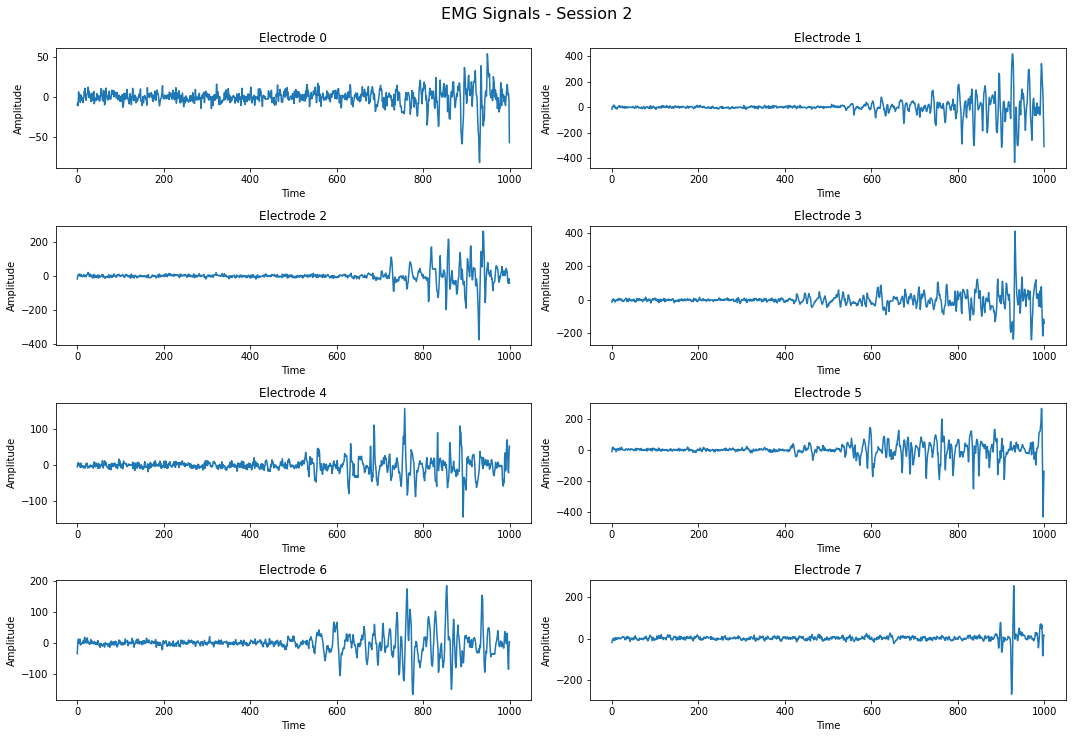

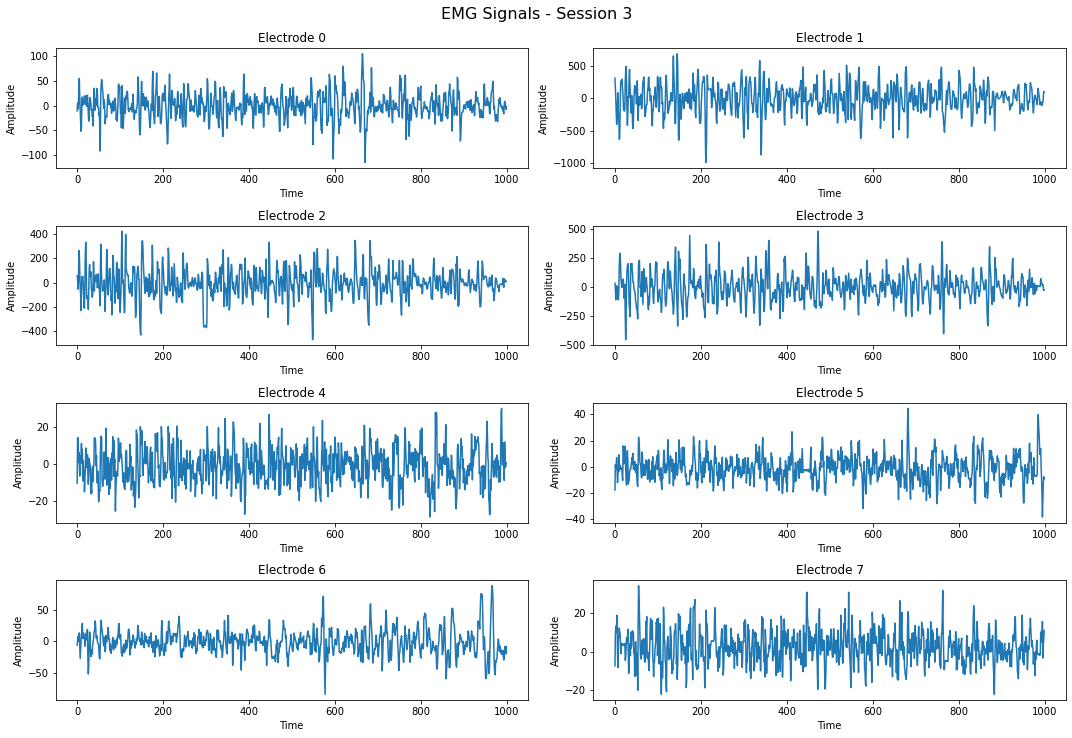

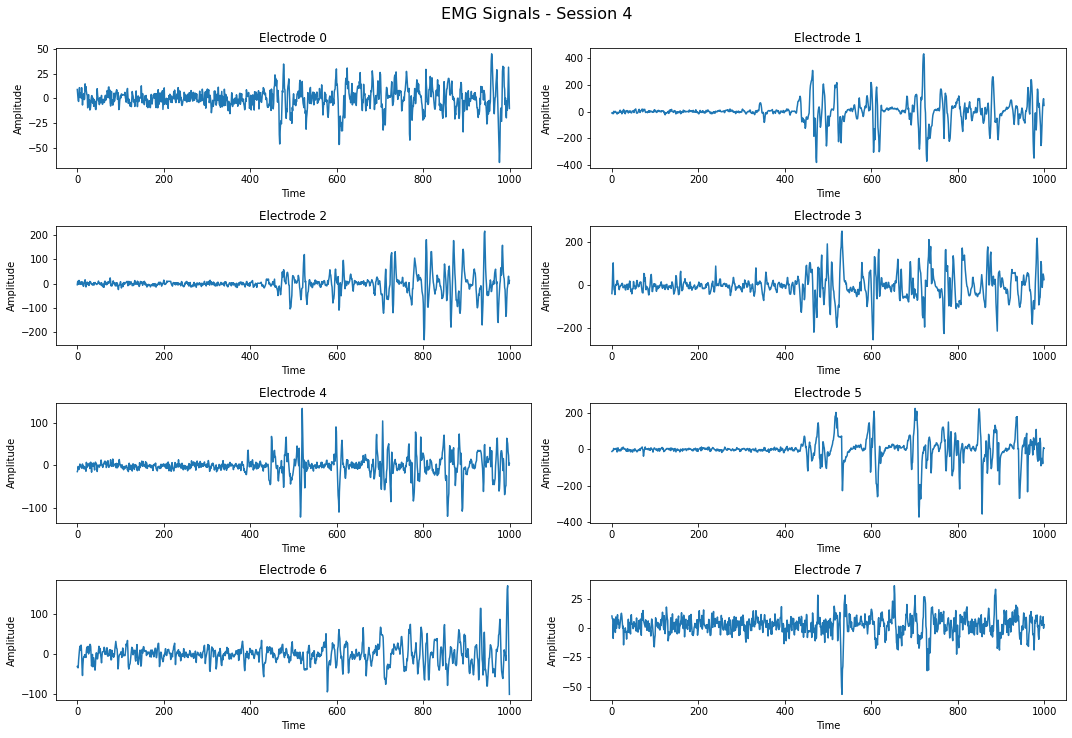

In [5]:
# Loop over all sessions
for session in range(data_X.shape[0]):
    plt.figure(figsize=(15, 10))
    
    for electrode in range(8):
        plt.subplot(4, 2, electrode + 1)
        plt.plot(data_X[session, electrode, :1000])
        plt.title(f"Electrode {electrode}")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.tight_layout()
    
    plt.suptitle(f"EMG Signals - Session {session}", fontsize=16, y=1.02)
    plt.show()

### Noise Filtering

The function below is to remove noise from raw sEMG signals while retaining important features by applying wavelet decomposition and thresholding.


In [10]:
def denoise_emg_wavelet(X,
                        wavelet='db8',
                        level=5,
                        thresh_rule='universal',   # 'universal' or float
                        mode='hard'):              # 'hard' or 'soft'
 
    n_trials, n_ch, n_samp = X.shape
    X_rec   = np.empty_like(X)
    tot_coef = 0
    kept_coef = 0

    for i in range(n_trials):
        for ch in range(n_ch):
            # 1) decomposition
            coeffs = pywt.wavedec(X[i, ch], wavelet=wavelet, level=level)
            
            # 2) calculation
            if thresh_rule == 'universal':
                # estimation median
                sigma = np.median(np.abs(coeffs[-1])) / 0.6745
                thresh = sigma * np.sqrt(2 * np.log(len(X[i, ch])))
            else:
                thresh = float(thresh_rule)
            
            # 3) cooeficeints approximation
            new_coeffs = [coeffs[0]]
            for c in coeffs[1:]:
                tot_coef   += c.size
                c_th       = pywt.threshold(c, value=thresh, mode=mode)
                kept_coef  += np.count_nonzero(c_th)
                new_coeffs.append(c_th)
            
            # 4) reconstruction
            X_rec[i, ch] = pywt.waverec(new_coeffs, wavelet=wavelet)
    
    kept_pct = 100 * kept_coef / max(1, tot_coef)
    return X_rec[..., :n_samp], kept_pct  

X_denoised, kept = denoise_emg_wavelet(
        data_X, wavelet='db8', level=5, thresh_rule='universal', mode='hard')

print(f"Pourcentage de coefficients conservés : {kept:4.1f}%")
print("Shape reconstruite :", X_denoised.shape) 

Pourcentage de coefficients conservés : 14.0%
Shape reconstruite : (5, 8, 230000)


### Windows overlapping

The functions below normalize EMG signals per channel and segment them into overlapping sliding windows. For each window, the corresponding joint angles at the window’s end are used as labels, creating input-output pairs for training. The second function below focuses specifically on denoised EMG data for consistent preprocessing.

In [14]:
def preprocess_emg_data(X, y, window_size=500, stride=250):
    num_trials, num_channels, num_samples = X.shape
    _, num_dofs, _ = y.shape
    
    # Step 1: Z-score normalization
    X_norm = np.zeros_like(X)
    for trial in range(num_trials):
        for ch in range(num_channels):
            mean = X[trial, ch].mean()
            std = X[trial, ch].std()
            X_norm[trial, ch] = (X[trial, ch] - mean) / (std + 1e-8)

    # Step 2: Sliding window
    windows_X = []
    windows_y = []
    windows_X_denoised =[]
    group_ids =[]
    for trial in range(num_trials):
        for start in range(0, num_samples - window_size + 1, stride):
            end = start + window_size
            windows_X.append(X_norm[trial, :, start:end])
            windows_X_denoised.append(X_norm[trial, :, start:end])
            windows_y.append(y[trial, :, end - 1])  # axes : (trial, DOFs, time)
            
            group_ids.append(trial)

    # Convert to numpy arrays
    X_windowed = np.stack(windows_X)  # shape: (num_windows, 8, 500)
    X_denoised_windowed = np.stack(windows_X_denoised)  # shape: (num_windows, 8, 500)
    
    y_windowed = np.stack(windows_y)  # shape: (num_windows, 51, 500)

    groups = np.array(group_ids)
    return X_windowed, y_windowed, groups

def preprocess_emg_data_denoised(X, y, window_size=500, stride=250):
    num_trials, num_channels, num_samples = X.shape
    _, num_dofs, _ = y.shape
    
    # Step 1: Z-score normalization
    X_norm = np.zeros_like(X)
    for trial in range(num_trials):
        for ch in range(num_channels):
            mean = X[trial, ch].mean()
            std = X[trial, ch].std()
            X_norm[trial, ch] = (X[trial, ch] - mean) / (std + 1e-8)

    # Step 2: Sliding window
    
    windows_y = []
    windows_X_denoised =[]
    group_ids =[]
    for trial in range(num_trials):
        for start in range(0, num_samples - window_size + 1, stride):
            end = start + window_size
            windows_X_denoised.append(X_norm[trial, :, start:end])
            windows_y.append(y[trial, :, end - 1])  # axes : (trial, DOFs, time)
            group_ids.append(trial)
  

    # Convert to numpy array
    X_denoised_windowed = np.stack(windows_X_denoised)  # shape: (num_windows, 8, 500)
    
    y_windowed = np.stack(windows_y)  # shape: (num_windows, 51, 500)

    groups = np.array(group_ids)
    return X_denoised_windowed, y_windowed, groups

### Feature Extraction

The function below is about the feature extraction and we have also created new features inspired from the tsfel library. The formulas and information about the features are given below:
1. **Sum of Absolute Differences (SumAbsDiff)**  
$$
\sum_{i=1}^{N-1} |x_{i+1} - x_i|
$$  
Similar to WL, measures total signal variation.


2. **Skewness (Skew)**  
Measures asymmetry of the amplitude distribution:  
$$
\text{Skew} = \frac{\frac{1}{N} \sum (x_i - \bar{x})^3}{\left(\frac{1}{N} \sum (x_i - \bar{x})^2\right)^{3/2}}
$$

3. **Mean Absolute Deviation (MeanAbsDev)**  
$$
\frac{1}{N} \sum_{i=1}^N |x_i - \bar{x}|
$$  
Average distance of points from the mean, robust measure of variability.


4. **Mean Absolute Difference (MeanAbsDiff)**  
$$
\frac{1}{N-1} \sum_{i=1}^{N-1} |x_{i+1} - x_i|
$$  
Average magnitude of differences between consecutive samples.


5. **Mean Difference (MeanDiff)**  
$$
\frac{1}{N-1} \sum_{i=1}^{N-1} (x_{i+1} - x_i)
$$  
Average slope of the segment.


6. **Median Absolute Deviation (MedianAbsDev)**  
$$
\text{median}(|x_i - \text{median}(x)|)
$$  
Robust measure of variability around the median.


7. **Median Absolute Difference (MedianAbsDiff)**  
$$
\text{median}(|x_{i+1} - x_i|)
$$
Median magnitude of differences between consecutive samples.


8. **Median Difference (MedianDiff)**  
Median of consecutive differences $$ (x_{i+1} - x_i). $$


9. **Shannon Entropy**  
$$
H = -\sum_{k} p_k \log_2 p_k
$$  
Quantifies signal complexity/unpredictability based on histogram probabilities \(p_k\).


10. **Absolute Energy (AbsEnergy)**  
$$
\sum_{i=1}^N x_i^2
$$  
Total energy contained in the signal segment.


---

These features capture amplitude, variability, shape, complexity, and dynamics of the EMG signal, enabling better analysis and modeling.

In [6]:
class TimeDomainFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.01):
        self.threshold = threshold  # For ZC and SSC

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        n_windows, n_channels, window_size = X.shape
        features = []

        for window in X:
            feats = []
            for ch in range(n_channels):
                segment = window[ch]
                feats.extend(self._compute_features(segment))
            features.append(feats)

        return np.array(features)

    def _compute_features(self, segment):
    
        # 1. Amplitude & énergie
        mav = np.mean(np.abs(segment))
        rms = np.sqrt(np.mean(segment ** 2))

        # 2. Dispersion
        var = np.var(segment, ddof=1)        
        std = np.sqrt(var)                   

        # 3. Waveform length
        wl  = np.sum(np.abs(np.diff(segment)))

        # 4. Zéro-crossing
        zc  = np.sum(((segment[:-1] * segment[1:]) < 0) &
                    (np.abs(segment[:-1] - segment[1:]) >= self.threshold))

        # 5. Myopulse Percentage Rate
        mpr = np.sum(((np.diff(np.sign(np.diff(segment))) != 0) &
                    (np.abs(np.diff(segment, n=2)) >= self.threshold)))
        
#          New features
        sum_abs_diff = np.sum(np.abs(np.diff(segment)))
        skew = scipy.stats.skew(segment)
        mean_abs_dev = np.mean(np.abs(segment - np.mean(segment)))
        mean_abs_diff = np.mean(np.abs(np.diff(segment)))
        mean_diff = np.mean(np.diff(segment))
        median_abs_dev = np.median(np.abs(segment - np.median(segment)))
        median_abs_diff = np.median(np.abs(np.diff(segment)))
        median_diff = np.median(np.diff(segment))

        # Shannon entropy
        hist, _ = np.histogram(segment, bins=20, density=True)
        hist = hist[hist > 0]  # Remove zeros to avoid log(0)
        shannon_entropy = -np.sum(hist * np.log2(hist))

        abs_energy = np.sum(segment ** 2)

        return [
            mav, rms, var, std, wl, zc, mpr,  # Original
            sum_abs_diff, skew, mean_abs_dev, mean_abs_diff, mean_diff,
            median_abs_dev, median_abs_diff, median_diff,
            shannon_entropy, abs_energy  # New features
        ]


#### PCA (Principle Component Analysis) 

PCA is a dimensionality reduction technique that transforms the original features into a smaller set of uncorrelated components while retaining most of the data’s variance. This reduces feature redundancy and noise, improving computational efficiency and potentially enhancing model performance.


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_pca(X_features, variance_threshold=0.95):
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_features)

    # Apply PCA
    pca = PCA(n_components=variance_threshold)
    X_pca = pca.fit_transform(X_scaled)

    print(f"Original shape: {X_features.shape}, PCA-reduced shape: {X_pca.shape}")
    return X_pca, pca, scaler

# function to plot
def plot_pca_variance(pca):
    explained_variance = pca.explained_variance_ratio_
    cum_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6,
            label='Individual Explained Variance')
    plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker='o', color='red',
             label='Cumulative Explained Variance')

    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA Explained Variance per Component')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Data Flatening

why we have done the data flattening

In [102]:
# Assuming you already have X and y loaded
X_processed, y_processed, groups = preprocess_emg_data(data_X, data_Y, window_size=500, stride=250)

X_processed_denoised, y_processed, groups = preprocess_emg_data(X_denoised, data_Y, window_size=500, stride=250)

X_flat = X_processed.reshape(X_processed.shape[0], -1)

X_denoised_flat = X_processed_denoised.reshape(X_processed_denoised.shape[0], -1)

print("Processed X shape:", X_processed.shape)  # (num_windows, 8, 500)
print("Processed X_denoised shape:", X_processed_denoised.shape)  # (num_windows, 8, 500)

print("Processed X shape flattend:", X_flat.shape)  # (num_windows, 8, 500)

print("Processed X_denoised shape flattend:", X_denoised_flat.shape)  # (num_windows, 8, 500)

print("Processed y shape:", y_processed.shape)  # (num_windows, 51, 500)
print(groups.shape)

Processed X shape: (4595, 8, 500)
Processed X_denoised shape: (4595, 8, 500)
Processed X shape flattend: (4595, 4000)
Processed X_denoised shape flattend: (4595, 4000)
Processed y shape: (4595, 51)
(4595,)


### Feature Selection

I am performing eature selection below using a Random Forest Regressor, which estimates the importance of each feature based on how much it improves the prediction accuracy across all trees. This method helps to reduce the dimensionality by keeping only the most relevant features, which can improve model performance and reduce overfitting. The trained selector can also be applied to new data to ensure consistent feature selection.

$$
\text{Importance}(f_i) = \frac{1}{T} \sum_{t=1}^T \Delta \text{MSE}_{t}(f_i)
$$

Where:

- $(f_i)$  = feature $ (i)$ 
- $ (T)$  = total number of trees
- $ ( \Delta \text{MSE}_{t}(f_i))$  = decrease in mean squared error when splitting on feature $ (i)$  in tree $(t)$ 

We select features where:

$$
\text{Importance}(f_i) \geq \text{median importance}
$$

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

def select_important_features(X, y, n_estimators=100, threshold="median"):
 
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    rf.fit(X, y)
    
    selector = SelectFromModel(rf, threshold=threshold, prefit=True)
    X_selected = selector.transform(X)
    
    print(f"{X_selected.shape[1]} features selection shape {X.shape[1]}")
    return X_selected, selector

# feature extraction :
X_selected, selector = select_important_features(X_features, y_processed)


68 features selection shape 136


Testing PCA after the feature extraction

In [103]:
extractor = TimeDomainFeatureExtractor()
X_features = extractor.transform(X_processed)  

In [17]:
X_pca, pca_model, scaler_model = apply_pca(X_features, variance_threshold=0.95)

Original shape: (4595, 136), PCA-reduced shape: (4595, 40)


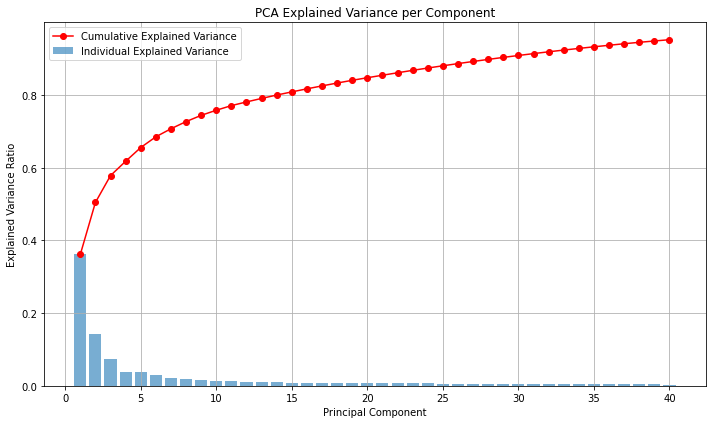

In [18]:
plot_pca_variance(pca_model)


This plot shows how much variance is captured by each principal component after applying PCA. 
- The blue bars represent the individual explained variance of each component.
- The red curve shows the cumulative explained variance.
We used a variance threshold of 0.95, which reduced the original 136 features to 40 components while retaining 95% of the total variance. This helps in reducing dimensionality while preserving most of the information in the data.

## [Baseline Approaches](#Baseline-Approaches)

This section is related to the cross validation strategy and baseline line models which is third and fourth objective in the project. I have used the following two models:

1- Support Vector Regression


2- Random Forest Regressor

The reason of using SVR is because of its effectiveness in high-dimensional feature spaces and it is robust to the overfitting. It also allows to capture non-linear relationships through kernels as it is very important because joint angles is non-linear. For the second model, Ihave used Random Forest regressor because it handle Non-parametric and handles non-linearities and it is also robust overfitting as well. 

I have check my models with Leave One Session Out (LOSO) cross validation strategy. The reason for using LOSO is because it measures generalization across entire sessions and more realistic in real-life sEMG applications where session conditions vary significantly. We will choose the best one in our case and continue our implementation with this cross validation in other models. 

### Guided Gestures

I have implemented below SVR models for the guided gestures dataset.

### 2.1 SVR

In [ ]:
#preprocessing the dataset
X_processed, y_processed, groups = preprocess_emg_data_denoised(
    X_denoised, data_Y, window_size=500, stride=250
)

# Feature extraction step
extractor = TimeDomainFeatureExtractor()
X_features = extractor.transform(X_processed) 


# Define SVR model
base_svr = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Leave-One-Trial-Out Cross-Validation
logo = LeaveOneGroupOut()
rmse_scores = []

for train_idx, val_idx in logo.split(X_features, y_processed, groups=groups):
    X_train, X_val = X_pca[train_idx], X_pca[val_idx]
    y_train, y_val = y_processed[train_idx], y_processed[val_idx]
    
    y_pred_all = []

    # Loop over 51 output dimensions
    for i in range(y_processed.shape[1]):
        base_svr.fit(X_train, y_train[:, i])
        y_pred = base_svr.predict(X_val)                   # Predict on validation
        y_pred_all.append(y_pred)

    # Stack predictions to match (n_samples, 51)
    y_pred_all = np.stack(y_pred_all, axis=1)

    # Compute RMSE over all outputs (51 DoFs)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_all))
    rmse_scores.append(rmse)

# Output the results
print("Per-trial RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

Per-trial RMSE scores: [8.077620324884748, 7.977433536846874, 8.818019979472865, 7.759198201810684, 8.161374754912563]
Mean RMSE: 8.158729359585546


The above SVR model predicts 51 joint angle independently and the cross validation strategy here I use is Leave one session out, I think it's better to use multi regressor with SVR to predicts all the 51 joint angle. It will also reduced the execution of the model as well. 

In [ ]:
#preprocessing the dataset
X_processed, y_processed, groups = preprocess_emg_data_denoised(X_denoised, data_Y, window_size=500, stride=250)
# Feature extraction step
extractor = TimeDomainFeatureExtractor()
X_features = extractor.transform(X_processed) 

# # appling PCA 
# X_pca, pca_model, scaler_model = apply_pca(X_features, variance_threshold=0.95)

# Define SVR model
base_svr = SVR(kernel='linear', C=1.0, epsilon=0.1)

# MultiOutput wrapper because you have 51 outputs
model_base_svr = MultiOutputRegressor(base_svr)

selector_svr = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")

# Leave-One-Trial-Out Cross-Validation
logo = LeaveOneGroupOut()
rmse_scores = []
selected_indices_per_fold = []

for fold_idx, (train_idx, val_idx) in enumerate(logo.split(X_features, y_processed, groups=groups), start=1):
#     for train_idx, val_idx in logo.split(X_pca, y_processed, groups=groups):
    print(f"\n========== Fold {fold_idx}/{len(np.unique(groups))} ==========")
    X_train, X_val = X_features[train_idx], X_features[val_idx]
    y_train, y_val = y_processed[train_idx], y_processed[val_idx] 
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled   = scaler.transform(X_val)
    
    X_tr_sel = selector_svr.fit_transform(X_train_scaled, y_train)
    X_va_sel = selector_svr.transform(X_val_scaled)
    selected_idx = np.where(selector_svr.get_support())[0]
    selected_indices_per_fold.append(selected_idx)

    print(f"Selected {len(selected_idx)} features: {selected_idx.tolist()}")
    
    model_base_svr.fit(X_tr_sel, y_train)
    
    
    y_pred = model_base_svr.predict(X_va_sel)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print("The RMSE score is:{}".format(rmse))
    rmse_scores.append(rmse)

# Output the results
print("Per-trial RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

# Cross validation results
print("\n=========LOSO =========")
print("RMSE par session :", [round(s, 4) for s in rmse_scores])
print("RMSE moyen :", round(np.mean(rmse_scores), 4))

# -Selected feature per fold 
print("\n========= Features sélectionnées par fold =========")
for i, idxs in enumerate(selected_indices_per_fold, start=1):
    print(f"Fold {i} : {len(idxs)} features -> {idxs.tolist()}")

# frequency of the selected features 
all_selected = np.concatenate(selected_indices_per_fold)
feature_counts = Counter(all_selected)

print("\n========= frequency of the selected features =========")
for feat_idx, count in feature_counts.most_common():
    print(f"Feature {feat_idx} : sélectionnée dans {count} folds")


========== Fold 1/5 ==========
Selected 68 features: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 24, 26, 27, 29, 30, 32, 37, 38, 40, 41, 44, 47, 51, 52, 53, 55, 56, 57, 58, 60, 61, 63, 64, 68, 69, 70, 71, 72, 75, 77, 78, 80, 82, 97, 99, 102, 103, 104, 105, 106, 107, 109, 111, 112, 115, 118, 123, 124, 125, 126]
The RMSE score is:7.307946946075691

========== Fold 2/5 ==========
Selected 68 features: [0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 14, 16, 17, 19, 20, 21, 24, 26, 27, 29, 30, 33, 38, 39, 40, 41, 44, 47, 51, 52, 55, 56, 57, 58, 60, 61, 63, 64, 65, 68, 69, 70, 71, 72, 75, 77, 78, 80, 81, 82, 84, 99, 102, 103, 104, 105, 106, 107, 109, 111, 112, 115, 118, 124, 125, 131, 134]
The RMSE score is:7.234740416656546

========== Fold 3/5 ==========
Selected 68 features: [0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 24, 26, 27, 29, 30, 33, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 51, 53, 55, 57, 58, 60, 61, 63, 64, 68, 69, 70, 71, 72, 75, 77, 78, 82, 84, 99, 10

We know that we have 17 features for each electrode, let's measure the impact of feature decomposition on the Root Mean Square Error (RMSE) for guided gestures with the help of PCA

In [ ]:
from sklearn.model_selection import GroupKFold, GroupShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from collections import Counter
import numpy as np
from sklearn.model_selection import GroupKFold, GroupShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from collections import Counter
import numpy as np

X_processed, y_processed, groups = preprocess_emg_data_denoised(X_denoised, data_Y, window_size=500, stride=250)

# Feature extraction step
extractor = TimeDomainFeatureExtractor()
X_features = extractor.transform(X_processed) 

# appling PCA 
X_pca, pca_model, scaler_model = apply_pca(X_features, variance_threshold=0.95)

        # --- 2. Define SVR model ---
base_svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
    # MultiOutput wrapper because you have 51 outputs
svr_model = MultiOutputRegressor(base_svr)

svr_rmse_scores = []

selected_indices_per_fold = []

selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")

# Leave-One-Trial-Out Cross-Validation
logo = LeaveOneGroupOut()
rmse_scores = []

for fold_idx, (train_idx, val_idx) in enumerate(logo.split(X_pca, y_processed, groups=groups), start=1):
#     for train_idx, val_idx in logo.split(X_pca, y_processed, groups=groups):
    print(f"\n========== Fold {fold_idx}/{len(np.unique(groups))} ==========")
    X_train, X_val = X_pca[train_idx], X_pca[val_idx]
    y_train, y_val = y_processed[train_idx], y_processed[val_idx] 
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled   = scaler.transform(X_val)
    
    X_tr_sel = selector.fit_transform(X_train_scaled, y_train)
    X_va_sel = selector.transform(X_val_scaled)
    selected_idx = np.where(selector.get_support())[0]
    selected_indices_per_fold.append(selected_idx)

    print(f"Selected {len(selected_idx)} features: {selected_idx.tolist()}")
    
    svr_model.fit(X_tr_sel, y_train)
    
    
    y_pred = svr_model.predict(X_va_sel)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print("The RMSE score is:{}".format(rmse))
    svr_rmse_scores.append(rmse)

# Output the results
print("Per-trial RMSE scores:", svr_rmse_scores)
print("Mean RMSE:", np.mean(svr_rmse_scores))


# Cross validation results
print("\n=========LOSO =========")
print("RMSE par session :", [round(s, 4) for s in svr_rmse_scores])
print("RMSE moyen :", round(np.mean(svr_rmse_scores), 4))

# Selected feature per fold
print("\n========= Features sélectionnées par fold =========")
for i, idxs in enumerate(selected_indices_per_fold, start=1):
    print(f"Fold {i} : {len(idxs)} features -> {idxs.tolist()}")

#  frequency of the selected features 
all_selected = np.concatenate(selected_indices_per_fold)
feature_counts = Counter(all_selected)

print("\n========= frequency of the selected features =========")
for feat_idx, count in feature_counts.most_common():
    print(f"Feature {feat_idx} : sélectionnée dans {count} folds")


Original shape: (4595, 136), PCA-reduced shape: (4595, 35)

========== Fold 1/5 ==========
Selected 18 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 20, 21, 24, 26, 32]
The RMSE score is:7.827815490716185

========== Fold 2/5 ==========
Selected 18 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 20, 21, 24, 26, 29, 32]
The RMSE score is:7.956696812163343

========== Fold 3/5 ==========
Selected 18 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 24, 26, 30, 32]
The RMSE score is:9.517110272920208

========== Fold 4/5 ==========
Selected 18 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 20, 23, 24, 29, 34]
The RMSE score is:7.8522203664034524

========== Fold 5/5 ==========
Selected 18 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 20, 24, 27, 32, 34]
The RMSE score is:8.133522538247373
Per-trial RMSE scores: [7.827815490716185, 7.956696812163343, 9.517110272920208, 7.8522203664034524, 8.133522538247373]
Mean RMSE: 8.257473096090113

========= Résumé LOSO ===

#### 2.1.1 Comparison of model with and without PCA

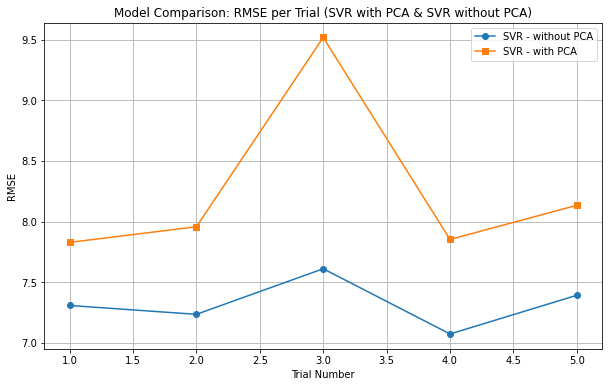

In [122]:
trials = np.arange(1, len(svr_rmse_scores) + 1)

plt.figure(figsize=(10, 6))
plt.plot(trials, rmse_scores, marker='o', label='SVR - without PCA')
plt.plot(trials, svr_rmse_scores, marker='s', label='SVR - with PCA')
plt.xlabel('Trial Number')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE per Trial (SVR with PCA & SVR without PCA)')
plt.legend()
plt.grid(True)
plt.show()

#### 2.1.2 Predictions

So, from the above results we can see the svr model without the PCA performs better, so we will use this model for the predictions

In [138]:
X_test_reshaped = data_T.reshape(-1, 8, 500)  # shape: (1660, 8, 500)
print("The shape of the test set:",X_test_reshaped.shape)

print("The shape of the dataset:",data_X.shape)

The shape of the test set: (1660, 8, 500)
The shape of the dataset: (5, 8, 230000)


In [139]:
# Use the same instance or reinstantiate with same params
feature_extractor = TimeDomainFeatureExtractor()
# Transform test data
X_test_features = feature_extractor.transform(X_test_reshaped)

In [140]:
print("The shape of the dataset:",X_test_features.shape)

The shape of the dataset: (1660, 136)


In [141]:
# X_test_pca = pca_model.transform(X_test_features)
X_test_feat_sel = selector_svr.transform(X_test_features)

In [142]:
print("The shape of the dataset:",X_test_feat_sel.shape)

The shape of the dataset: (1660, 68)


In [143]:
# Predict on the test set
y_pred_test = model_base_svr.predict(X_test_feat_sel)

In [144]:
y_pred_test

array([[ 5.08773348e+05, -4.43032459e+04, -2.05719773e+06, ...,
         4.00519969e+04, -8.46974486e+04,  2.15620026e+06],
       [ 4.20684224e+05, -8.84937816e+04, -1.62610704e+06, ...,
        -6.59101955e+04, -2.36562034e+04, -4.93916517e+05],
       [ 2.68821503e+05, -7.93838356e+04, -1.16280746e+06, ...,
        -7.66290919e+04, -2.53982990e+04, -8.35136331e+05],
       ...,
       [ 7.11857236e+06, -2.31913121e+06, -2.35852247e+07, ...,
        -1.47768729e+06,  1.52770176e+05, -2.58133783e+07],
       [ 1.47165569e+06, -4.33465342e+05, -6.20089043e+06, ...,
        -3.71455286e+05, -1.25605370e+05, -4.07525839e+06],
       [ 3.84980356e+05, -1.07956641e+04, -2.61191257e+06, ...,
        -1.54928768e+05, -1.18061235e+05, -1.04479560e+05]])

### Free Gestures

I have implemented below SVR models for the free gestures dataset.

In [ ]:
X_denoised_free, f_kept_free = denoise_emg_wavelet(
        data_X_free, wavelet='db4', level=3, thresh_rule='universal', mode='hard')

#preprocessing the dataset
X_processed, y_processed, groups = preprocess_emg_data_denoised(X_denoised_free, data_Y_free, window_size=500, stride=250)
# Feature extraction step
extractor = TimeDomainFeatureExtractor()
X_features = extractor.transform(X_processed) 

# # appling PCA 
# X_pca, pca_model, scaler_model = apply_pca(X_features, variance_threshold=0.95)

# Define SVR model
base_svr = SVR(kernel='linear', C=1.0, epsilon=0.1)

# MultiOutput wrapper because you have 51 outputs
model_free = MultiOutputRegressor(base_svr)

selector_svr_free = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")

# Leave-One-Trial-Out Cross-Validation
logo = LeaveOneGroupOut()
rmse_scores_free = []
selected_indices_per_fold = []

for fold_idx, (train_idx, val_idx) in enumerate(logo.split(X_features, y_processed, groups=groups), start=1):
#     for train_idx, val_idx in logo.split(X_pca, y_processed, groups=groups):
    print(f"\n========== Fold {fold_idx}/{len(np.unique(groups))} ==========")
    X_train, X_val = X_features[train_idx], X_features[val_idx]
    y_train, y_val = y_processed[train_idx], y_processed[val_idx] 
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled   = scaler.transform(X_val)
    
    X_tr_sel = selector_svr_free.fit_transform(X_train_scaled, y_train)
    X_va_sel = selector_svr_free.transform(X_val_scaled)
    selected_idx = np.where(selector_svr_free.get_support())[0]
    selected_indices_per_fold.append(selected_idx)

    print(f"Selected {len(selected_idx)} features: {selected_idx.tolist()}")
    
    model_free.fit(X_tr_sel, y_train)
    
    
    y_pred = model_free.predict(X_va_sel)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print("The RMSE score is:{}".format(rmse))
    rmse_scores_free.append(rmse)

# Output the results
print("Per-trial RMSE scores:", rmse_scores_free)
print("Mean RMSE:", np.mean(rmse_scores_free))

# Cross validation results
print("\n=========LOSO =========")
print("RMSE par session :", [round(s, 4) for s in rmse_scores_free])
print("RMSE moyen :", round(np.mean(rmse_scores_free), 4))

# Selected features per fold
print("\n========= Features sélectionnées par fold =========")
for i, idxs in enumerate(selected_indices_per_fold, start=1):
    print(f"Fold {i} : {len(idxs)} features -> {idxs.tolist()}")

# frequency of the selected features
all_selected = np.concatenate(selected_indices_per_fold)
feature_counts = Counter(all_selected)

print("\n========= frequency of the selected features =========")
for feat_idx, count in feature_counts.most_common():
    print(f"Feature {feat_idx} : sélectionnée dans {count} folds")


========== Fold 1/5 ==========
Selected 68 features: [0, 5, 6, 8, 9, 11, 12, 13, 14, 15, 22, 23, 25, 29, 30, 31, 32, 39, 40, 42, 46, 47, 48, 49, 55, 56, 57, 58, 59, 61, 63, 64, 65, 66, 68, 73, 74, 76, 77, 80, 81, 82, 83, 87, 88, 90, 91, 93, 97, 99, 106, 107, 108, 109, 110, 112, 114, 115, 116, 117, 124, 125, 127, 130, 131, 132, 133, 134]
The RMSE score is:11.169098944736907

========== Fold 2/5 ==========
Selected 68 features: [5, 6, 8, 12, 13, 14, 15, 17, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 39, 40, 42, 43, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 59, 60, 63, 64, 65, 66, 67, 68, 73, 74, 76, 77, 80, 81, 82, 83, 90, 91, 93, 97, 99, 107, 108, 110, 114, 115, 116, 117, 124, 125, 127, 131, 132, 133, 134]
The RMSE score is:14.60138623092625

========== Fold 3/5 ==========
Selected 68 features: [0, 1, 2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 22, 25, 27, 29, 30, 31, 32, 39, 40, 42, 46, 47, 48, 49, 55, 56, 57, 58, 59, 61, 63, 64, 65, 66, 68, 74, 76, 80, 81, 82, 83, 86, 87, 92, 93, 97, 99, 10

We know that we have 17 features for each electrode, let's measure the impact of feature decomposition on the Root Mean Square Error (RMSE) for free gestures with the help of PCA

In [ ]:
X_denoised_free, f_kept_free = denoise_emg_wavelet(
        data_X_free, wavelet='db4', level=3, thresh_rule='universal', mode='hard')

X_processed, y_processed, groups = preprocess_emg_data_denoised(X_denoised_free, data_Y_free, window_size=500, stride=250)

# Feature extraction step
extractor = TimeDomainFeatureExtractor()
X_features = extractor.transform(X_processed) 

# appling PCA 
X_pca_free, pca_model_free, scaler_model_free = apply_pca(X_features, variance_threshold=0.95)

        # --- 2. Define SVR model ---
base_svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
    # MultiOutput wrapper because you have 51 outputs
svr_model_free = MultiOutputRegressor(base_svr)

svr_rmse_scores_free = []

selected_indices_per_fold = []

selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")

# Leave-One-Trial-Out Cross-Validation
logo = LeaveOneGroupOut()
rmse_scores = []

for fold_idx, (train_idx, val_idx) in enumerate(logo.split(X_pca_free, y_processed, groups=groups), start=1):
#     for train_idx, val_idx in logo.split(X_pca, y_processed, groups=groups):
    print(f"\n========== Fold {fold_idx}/{len(np.unique(groups))} ==========")
    X_train, X_val = X_pca_free[train_idx], X_pca_free[val_idx]
    y_train, y_val = y_processed[train_idx], y_processed[val_idx] 
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled   = scaler.transform(X_val)
    
    X_tr_sel = selector.fit_transform(X_train_scaled, y_train)
    X_va_sel = selector.transform(X_val_scaled)
    selected_idx = np.where(selector.get_support())[0]
    selected_indices_per_fold.append(selected_idx)

    print(f"Selected {len(selected_idx)} features: {selected_idx.tolist()}")
    
    svr_model.fit(X_tr_sel, y_train)
    
    
    y_pred = svr_model.predict(X_va_sel)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print("The RMSE score is:{}".format(rmse))
    svr_rmse_scores_free.append(rmse)

# Output the results
print("Per-trial RMSE scores:", svr_rmse_scores_free)
print("Mean RMSE:", np.mean(svr_rmse_scores_free))


# Cross validation results
print("\n=========LOSO =========")
print("RMSE par session :", [round(s, 4) for s in svr_rmse_scores_free])
print("RMSE moyen :", round(np.mean(svr_rmse_scores_free), 4))


# Selected features per fold 
print("\n========= Features sélectionnées par fold =========")
for i, idxs in enumerate(selected_indices_per_fold, start=1):
    print(f"Fold {i} : {len(idxs)} features -> {idxs.tolist()}")

# frequency of the selected features 
all_selected = np.concatenate(selected_indices_per_fold)
feature_counts = Counter(all_selected)

print("\n========= frequency of the selected features =========")
for feat_idx, count in feature_counts.most_common():
    print(f"Feature {feat_idx} : sélectionnée dans {count} folds")


Original shape: (5395, 136), PCA-reduced shape: (5395, 36)

========== Fold 1/5 ==========
Selected 18 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 17, 20, 22, 25, 26]
The RMSE score is:11.130543160218098

========== Fold 2/5 ==========
Selected 18 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 26, 29, 33]
The RMSE score is:14.562947012559478

========== Fold 3/5 ==========
Selected 18 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 25, 29, 30, 33, 35]
The RMSE score is:11.481745170002227

========== Fold 4/5 ==========
Selected 18 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 20, 22, 26, 29, 30]
The RMSE score is:10.695539692805976

========== Fold 5/5 ==========
Selected 18 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 22, 26, 28, 29, 30]
The RMSE score is:9.816256858177386
Per-trial RMSE scores: [11.130543160218098, 14.562947012559478, 11.481745170002227, 10.695539692805976, 9.816256858177386]
Mean RMSE: 11.537406378752632

========= Résumé L

#### 2.1.1 Comparison of model with and without PCA

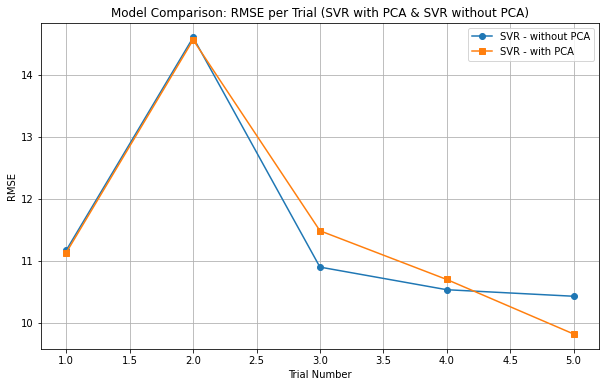

In [133]:
trials = np.arange(1, len(svr_rmse_scores_free) + 1)

plt.figure(figsize=(10, 6))
plt.plot(trials, rmse_scores_free, marker='o', label='SVR - without PCA')
plt.plot(trials, svr_rmse_scores_free, marker='s', label='SVR - with PCA')
plt.xlabel('Trial Number')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE per Trial (SVR with PCA & SVR without PCA)')
plt.legend()
plt.grid(True)
plt.show()

#### 2.1.2 Predictions

In [147]:
X_test_reshaped = data_T_free.reshape(-1, 8, 500)  
print("The shape of the test set:",X_test_reshaped.shape)

print("The shape of the dataset:",data_X_free.shape)

The shape of the test set: (1540, 8, 500)
The shape of the dataset: (5, 8, 270000)


In [148]:
# Use the same instance or reinstantiate with same params
feature_extractor = TimeDomainFeatureExtractor()
# Transform test data
X_test_features = feature_extractor.transform(X_test_reshaped)

In [149]:
print("The shape of the dataset:",X_test_features.shape)

The shape of the dataset: (1540, 136)


In [150]:
# X_test_pca = pca_model.transform(X_test_features)
X_test_feat_sel = selector_svr_free.transform(X_test_features)

In [151]:
print("The shape of the dataset:",X_test_feat_sel.shape)

The shape of the dataset: (1540, 68)


In [154]:
# Predict on the test set
y_pred_test_free = model_free.predict(X_test_feat_sel)

In [155]:
y_pred_test_free

array([[  -6835.67493112,    3096.50569521,   21754.41445127, ...,
           3825.73689356,   -2148.91755225,  127569.57809327],
       [  -6371.32933265,    2863.43405029,   20306.00695711, ...,
           3637.57274697,   -2028.11193947,  121412.36366553],
       [  -6533.07572652,    2939.96502382,   20695.06263996, ...,
           3960.26512226,   -2275.81507793,  128152.37770923],
       ...,
       [ -94328.2058106 ,   52161.57122788,  350841.0210799 , ...,
         -38182.11188182,   39544.47343958,  273001.18852881],
       [-118026.80472848,   63742.25490799,  435438.84252937, ...,
         -48164.92062265,   49505.40977262,  290704.37991243],
       [-182329.76538199,   96880.15313267,  677221.84428215, ...,
         -82775.72322999,   83832.65151374,  319809.57021136]])

### Guided Gestures

Below I have implemented Random Forest Regressor for the guided gestures

### 2.2 Random Forest Regressor

In [ ]:

X_processed, y_processed, groups = preprocess_emg_data_denoised(X_denoised, data_Y, window_size=500, stride=250)

# Feature extraction step
extractor = TimeDomainFeatureExtractor()
X_features = extractor.transform(X_processed) 


# appling PCA 
# X_pca, pca_model, scaler_model = apply_pca(X_features, variance_threshold=0.95)


# Define the Random Forest Regressor inside MultiOutput
rf_model = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=400,  # Number of trees
    max_depth=None,    # No maximum depth
    random_state=42,   # For reproducibility
    n_jobs=-1          # Parallel computation
))


rf_rmse_scores = []

selector_rf = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")

logo = LeaveOneGroupOut()

for fold_idx, (train_idx, val_idx) in enumerate(logo.split(X_features, y_processed, groups=groups), start=1):
#     for train_idx, val_idx in logo.split(X_pca, y_processed, groups=groups):
    print(f"\n========== Fold {fold_idx}/{len(np.unique(groups))} ==========")
    X_train, X_val = X_features[train_idx], X_features[val_idx]
    y_train, y_val = y_processed[train_idx], y_processed[val_idx] 
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled   = scaler.transform(X_val)
    
    X_tr_sel = selector_rf.fit_transform(X_train_scaled, y_train)
    X_va_sel = selector_rf.transform(X_val_scaled)
    selected_idx = np.where(selector_rf.get_support())[0]
    selected_indices_per_fold.append(selected_idx)

    print(f"Selected {len(selected_idx)} features: {selected_idx.tolist()}")
    
    rf_model.fit(X_tr_sel, y_train)
    y_pred = rf_model.predict(X_va_sel)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rf_rmse_scores.append(rmse)

# Output the results
print("Per-trial RMSE scores:", rf_rmse_scores)
print("Mean RMSE:", np.mean(rf_rmse_scores))


# Cross validation 
print("\n========= Résumé LOSO =========")
print("RMSE par session :", [round(s, 4) for s in rf_rmse_scores])
print("RMSE moyen :", round(np.mean(rf_rmse_scores), 4))

# Selected features per fold 
print("\n========= Features sélectionnées par fold =========")
for i, idxs in enumerate(selected_indices_per_fold, start=1):
    print(f"Fold {i} : {len(idxs)} features -> {idxs.tolist()}")

# frequency of the selected features
all_selected = np.concatenate(selected_indices_per_fold)
feature_counts = Counter(all_selected)

print("\n========= frequency of the selected features =========")
for feat_idx, count in feature_counts.most_common():
    print(f"Feature {feat_idx} : sélectionnée dans {count} folds")



========== Fold 1/5 ==========
Selected 68 features: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 24, 26, 27, 29, 30, 32, 37, 38, 40, 41, 44, 47, 51, 52, 53, 55, 56, 57, 58, 60, 61, 63, 64, 68, 69, 70, 71, 72, 75, 77, 78, 80, 82, 97, 99, 102, 103, 104, 105, 106, 107, 109, 111, 112, 115, 118, 123, 124, 125, 126]


python(57908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(57909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(57910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(57911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(57912) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(57913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(57914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(57915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



========== Fold 2/5 ==========
Selected 68 features: [0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 14, 16, 17, 19, 20, 21, 24, 26, 27, 29, 30, 33, 38, 39, 40, 41, 44, 47, 51, 52, 55, 56, 57, 58, 60, 61, 63, 64, 65, 68, 69, 70, 71, 72, 75, 77, 78, 80, 81, 82, 84, 99, 102, 103, 104, 105, 106, 107, 109, 111, 112, 115, 118, 124, 125, 131, 134]

========== Fold 3/5 ==========
Selected 68 features: [0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 24, 26, 27, 29, 30, 33, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 51, 53, 55, 57, 58, 60, 61, 63, 64, 68, 69, 70, 71, 72, 75, 77, 78, 82, 84, 99, 104, 105, 106, 107, 109, 111, 112, 115, 118, 123, 124, 125, 126, 129, 134]

========== Fold 4/5 ==========
Selected 68 features: [0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 21, 24, 26, 27, 29, 30, 32, 33, 34, 35, 38, 39, 40, 41, 44, 47, 51, 53, 55, 56, 57, 58, 60, 61, 63, 64, 66, 68, 69, 72, 75, 77, 80, 82, 99, 102, 103, 104, 105, 106, 107, 109, 111, 112, 115, 118, 124, 125, 126, 129, 131, 132, 

In [158]:
      # Output the results
print("Per-trial RMSE scores:", rf_rmse_scores)
print("Mean RMSE:", np.mean(rf_rmse_scores))

Per-trial RMSE scores: [4.213195906294131, 4.776291650881703, 5.461905417004609, 3.9088846887023863, 4.3375485187098874]
Mean RMSE: 4.539565236318543


#### 2.2.1 Feature Importance

In [173]:
def plot_multioutput_feature_importance(model, feature_names, top_n=17):
    # Get importances from all regressors and average them
    all_importances = np.array([est.feature_importances_ for est in model.estimators_])
    mean_importance = np.mean(all_importances, axis=0)

    # Sort and plot top N features
    indices = np.argsort(mean_importance)[-top_n:]
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), mean_importance[indices], align='center')
    plt.yticks(range(top_n), [feature_names[i] for i in indices])
    plt.xlabel('Mean Feature Importance (across outputs)')
    plt.title('Random Forest Feature Importances (MultiOutput)')
    plt.tight_layout()
    plt.show()

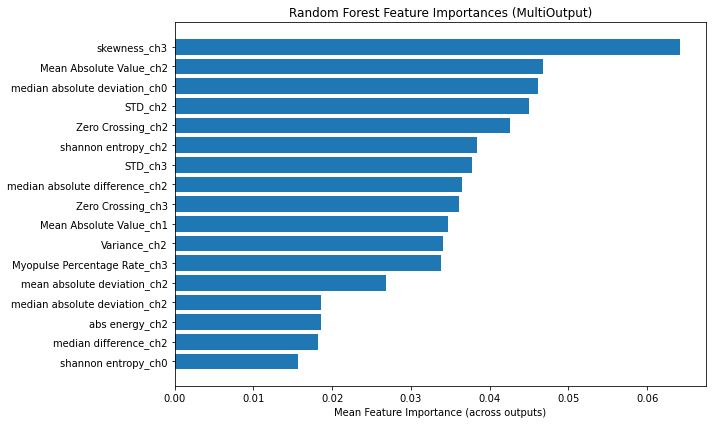

In [174]:
# Only if PCA was not applied
feature_names = [f"{stat}_ch{ch}" for ch in range(17) for stat in ["Mean Absolute Value", "Root Mean Square", "Variance", "STD", "Waveform length", "Zero Crossing", "Myopulse Percentage Rate","sum of absolute differences", "skewness", "mean absolute deviation", "mean absolute differences", "mean difference", "median absolute deviation", "median absolute difference","median difference", "shannon entropy", "abs energy"]]

# rf_model` is your fitted MultiOutputRegressor
plot_multioutput_feature_importance(rf_model, feature_names)

#### 2.2.2 Predictions

In [159]:
X_test_reshaped = data_T.reshape(-1, 8, 500)  # shape: (1660, 8, 500)
print("The shape of the test set:",X_test_reshaped.shape)

print("The shape of the dataset:",data_X.shape)

The shape of the test set: (1660, 8, 500)
The shape of the dataset: (5, 8, 230000)


In [160]:
# Use the same instance or reinstantiate with same params
feature_extractor = TimeDomainFeatureExtractor()
# Transform test data
X_test_features = feature_extractor.transform(X_test_reshaped)

In [161]:
print("The shape of the dataset:",X_test_features.shape)

The shape of the dataset: (1660, 136)


In [162]:
# X_test_pca = pca_model.transform(X_test_features)
X_test_feat_sel = selector_rf.transform(X_test_features)

In [163]:
# Predict on the test set
y_pred_test_rf = rf_model.predict(X_test_feat_sel)

In [164]:
y_pred_test_rf

array([[ 35.21682473, -63.89030722, -14.908934  , ...,  -1.31333111,
         -4.98181572, -34.07491191],
       [ 35.39956204, -63.91609858, -15.08729722, ...,  -1.3163843 ,
         -4.97345926, -34.16238681],
       [ 35.42896237, -63.83399827, -14.95520223, ...,  -1.3158948 ,
         -4.97355302, -34.18786777],
       ...,
       [ 36.04254427, -64.217934  , -15.43358542, ...,  -1.31433464,
         -4.96797587, -34.09371839],
       [ 36.17987556, -64.22407577, -15.87885801, ...,  -1.31360943,
         -4.96495803, -34.08941559],
       [ 35.69482399, -64.0745844 , -15.3922706 , ...,  -1.31275473,
         -4.97127346, -34.14025812]])

### Free Gestures

Below I have implemented Random Forest Regressor for the guided gestures

### 2.2 Random Forest Regressor

In [ ]:
X_denoised_free, f_kept_free = denoise_emg_wavelet(
        data_X_free, wavelet='db4', level=3, thresh_rule='universal', mode='hard')

#preprocessing the dataset
X_processed, y_processed, groups = preprocess_emg_data_denoised(X_denoised_free, data_Y_free, window_size=500, stride=250)
# Feature extraction step

# Feature extraction step
extractor = TimeDomainFeatureExtractor()
X_features = extractor.transform(X_processed) 


# appling PCA 
# X_pca, pca_model, scaler_model = apply_pca(X_features, variance_threshold=0.95)


# Define the Random Forest Regressor inside MultiOutput
rf_model_free = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=400,  # Number of trees
    max_depth=None,    # No maximum depth
    random_state=42,   # For reproducibility
    n_jobs=-1          # Parallel computation
))


rf_rmse_scores_free = []

selector_rf_free = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")

logo = LeaveOneGroupOut()

for fold_idx, (train_idx, val_idx) in enumerate(logo.split(X_features, y_processed, groups=groups), start=1):
#     for train_idx, val_idx in logo.split(X_pca, y_processed, groups=groups):
    print(f"\n========== Fold {fold_idx}/{len(np.unique(groups))} ==========")
    X_train, X_val = X_features[train_idx], X_features[val_idx]
    y_train, y_val = y_processed[train_idx], y_processed[val_idx] 
    
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled   = scaler.transform(X_val)
    
    X_tr_sel = selector_rf_free.fit_transform(X_train_scaled, y_train)
    X_va_sel = selector_rf_free.transform(X_val_scaled)
    selected_idx = np.where(selector_rf_free.get_support())[0]
    selected_indices_per_fold.append(selected_idx)

    print(f"Selected {len(selected_idx)} features: {selected_idx.tolist()}")
    
    rf_model_free.fit(X_tr_sel, y_train)
    y_pred = rf_model_free.predict(X_va_sel)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rf_rmse_scores_free.append(rmse)

# Output the results
print("Per-trial RMSE scores:", rf_rmse_scores_free)
print("Mean RMSE:", np.mean(rf_rmse_scores_free))


# Cross validation
print("\n========= Résumé LOSO =========")
print("RMSE par session :", [round(s, 4) for s in rf_rmse_scores_free])
print("RMSE moyen :", round(np.mean(rf_rmse_scores_free), 4))

# Selected features per fold 
print("\n========= Features sélectionnées par fold =========")
for i, idxs in enumerate(selected_indices_per_fold, start=1):
    print(f"Fold {i} : {len(idxs)} features -> {idxs.tolist()}")

# frequency of the selected features 
all_selected = np.concatenate(selected_indices_per_fold)
feature_counts = Counter(all_selected)

print("\n========= frequency of the selected features =========")
for feat_idx, count in feature_counts.most_common():
    print(f"Feature {feat_idx} : sélectionnée dans {count} folds")



========== Fold 1/5 ==========
Selected 68 features: [0, 5, 6, 8, 9, 11, 12, 13, 14, 15, 22, 23, 25, 29, 30, 31, 32, 39, 40, 42, 46, 47, 48, 49, 55, 56, 57, 58, 59, 61, 63, 64, 65, 66, 68, 73, 74, 76, 77, 80, 81, 82, 83, 87, 88, 90, 91, 93, 97, 99, 106, 107, 108, 109, 110, 112, 114, 115, 116, 117, 124, 125, 127, 130, 131, 132, 133, 134]

========== Fold 2/5 ==========
Selected 68 features: [5, 6, 8, 12, 13, 14, 15, 17, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 39, 40, 42, 43, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 59, 60, 63, 64, 65, 66, 67, 68, 73, 74, 76, 77, 80, 81, 82, 83, 90, 91, 93, 97, 99, 107, 108, 110, 114, 115, 116, 117, 124, 125, 127, 131, 132, 133, 134]

========== Fold 3/5 ==========
Selected 68 features: [0, 1, 2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 22, 25, 27, 29, 30, 31, 32, 39, 40, 42, 46, 47, 48, 49, 55, 56, 57, 58, 59, 61, 63, 64, 65, 66, 68, 74, 76, 80, 81, 82, 83, 86, 87, 92, 93, 97, 99, 101, 106, 108, 109, 110, 112, 114, 115, 116, 117, 124, 125, 127, 130, 131, 

#### 2.2.1 Feature Importance

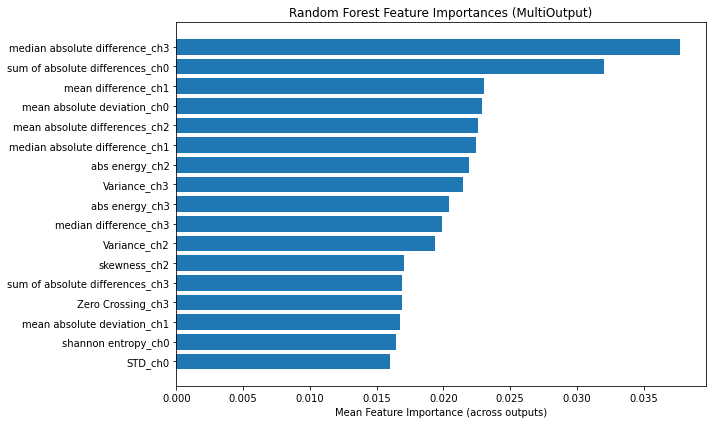

In [ ]:
# Only if PCA was not applied
feature_names = [f"{stat}_ch{ch}" for ch in range(17) for stat in ["Mean Absolute Value", "Root Mean Square", "Variance", "STD", "Waveform length", "Zero Crossing", "Myopulse Percentage Rate","sum of absolute differences", "skewness", "mean absolute deviation", "mean absolute differences", "mean difference", "median absolute deviation", "median absolute difference","median difference", "shannon entropy", "abs energy"]]

# rf_model_free is your fitted MultiOutputRegressor
plot_multioutput_feature_importance(rf_model_free, feature_names)

#### 2.2.2 Predictions

In [167]:
X_test_reshaped = data_T_free.reshape(-1, 8, 500)  # shape: (1660, 8, 500)
print("The shape of the test set:",X_test_reshaped.shape)

print("The shape of the dataset:",data_X_free.shape)

The shape of the test set: (1540, 8, 500)
The shape of the dataset: (5, 8, 270000)


In [168]:
# Use the same instance or reinstantiate with same params
feature_extractor = TimeDomainFeatureExtractor()
# Transform test data
X_test_features = feature_extractor.transform(X_test_reshaped)

In [169]:
print("The shape of the dataset:",X_test_features.shape)

The shape of the dataset: (1540, 136)


In [170]:
# X_test_pca = pca_model.transform(X_test_features)
X_test_feat_sel = selector_rf_free.transform(X_test_features)

In [171]:
# Predict on the test set
y_pred_test_rf_free = rf_model.predict(X_test_feat_sel)

In [172]:
y_pred_test_rf_free

array([[ 39.52977949, -64.33830351, -27.88186053, ...,  -1.33771443,
         -4.89013134, -38.38095076],
       [ 40.24369511, -64.36341319, -29.68573028, ...,  -1.34640321,
         -4.90651641, -38.50081116],
       [ 40.26219514, -64.33653347, -30.04021433, ...,  -1.35099206,
         -4.88903551, -39.10399799],
       ...,
       [ 38.40054446, -64.15907925, -23.6566285 , ...,  -1.32064326,
         -4.92914701, -36.30491662],
       [ 38.18770042, -64.07092459, -22.78902468, ...,  -1.35904573,
         -4.82368379, -36.64513282],
       [ 38.36289206, -63.93695352, -24.16336483, ...,  -1.32376074,
         -4.91865241, -37.00226467]])

### Comparison

### 2.3 Comparison of the two models based on guided gestures

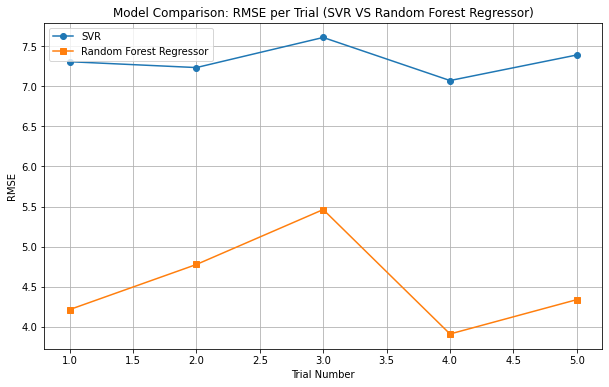

In [179]:
trials = np.arange(1, len(rmse_scores) + 1)

plt.figure(figsize=(10, 6))
plt.plot(trials, rmse_scores, marker='o', label='SVR')
plt.plot(trials, rf_rmse_scores, marker='s', label='Random Forest Regressor')
plt.xlabel('Trial Number')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE per Trial (SVR VS Random Forest Regressor)')
plt.legend()
plt.grid(True)
plt.show()

### 2.3 Comparison of the two models based on free gestures

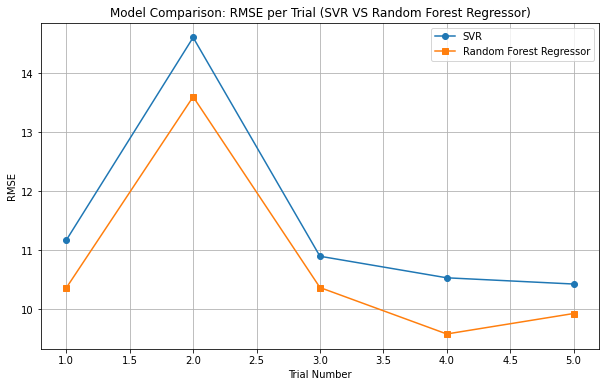

In [180]:
trials = np.arange(1, len(rmse_scores_free) + 1)

plt.figure(figsize=(10, 6))
plt.plot(trials, rmse_scores_free, marker='o', label='SVR')
plt.plot(trials, rf_rmse_scores_free, marker='s', label='Random Forest Regressor')
plt.xlabel('Trial Number')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE per Trial (SVR VS Random Forest Regressor)')
plt.legend()
plt.grid(True)
plt.show()

### 2.4 Full pipeline

### Guided Gestures

In [ ]:

X_processed, y_processed, groups = preprocess_emg_data_denoised(X_denoised, data_Y, window_size=500, stride=250)

# Define pipeline
pipeline = Pipeline([
    ("feature_extraction", TimeDomainFeatureExtractor()),
    ("scaler", StandardScaler()),
    ("feature_selection", SelectFromModel(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        threshold="median"
    )),
    ("regressor", MultiOutputRegressor(RandomForestRegressor(
        n_estimators=400,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )))
])

rf_pipeline_rmse_scores = []
selected_indices_per_fold = []

logo = LeaveOneGroupOut()

for fold_idx, (train_idx, val_idx) in enumerate(logo.split(X_processed, y_processed, groups=groups), start=1):
#     for train_idx, val_idx in logo.split(X_pca, y_processed, groups=groups):
    print(f"\n========== Fold {fold_idx}/{len(np.unique(groups))} ==========")
    X_train, X_val = X_processed[train_idx], X_processed[val_idx]
    y_train, y_val = y_processed[train_idx], y_processed[val_idx] 
    
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)

    selected_idx = pipeline.named_steps['feature_selection'].get_support(indices=True)
    selected_indices_per_fold.append(selected_idx)
    print(f"Selected {len(selected_idx)} features: {selected_idx.tolist()}")
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rf_pipeline_rmse_scores.append(rmse)
    

      # Output the results
print("Per-trial RMSE scores:", rf_pipeline_rmse_scores)
print("Mean RMSE:", np.mean(rf_pipeline_rmse_scores))


# Cross validation 
print("\n========= Résumé LOSO =========")
print("RMSE par session :", [round(s, 4) for s in rf_pipeline_rmse_scores])
print("RMSE moyen :", round(np.mean(rf_pipeline_rmse_scores), 4))

# Selected feature per fold 
print("\n========= Features sélectionnées par fold =========")
for i, idxs in enumerate(selected_indices_per_fold, start=1):
    print(f"Fold {i} : {len(idxs)} features -> {idxs.tolist()}")

# frequency of the selected features 
all_selected = np.concatenate(selected_indices_per_fold)
feature_counts = Counter(all_selected)

print("\n========= frequency of the selected features =========")
for feat_idx, count in feature_counts.most_common():
    print(f"Feature {feat_idx} : sélectionnée dans {count} folds")



========== Fold 1/5 ==========


python(61805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(61806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(61807) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(61808) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(61809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(61810) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(61811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(61812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Selected 68 features: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 24, 26, 27, 29, 30, 32, 37, 38, 40, 41, 44, 47, 51, 52, 53, 55, 56, 57, 58, 60, 61, 63, 64, 68, 69, 70, 71, 72, 75, 77, 78, 80, 82, 97, 99, 102, 103, 104, 105, 106, 107, 109, 111, 112, 115, 118, 123, 124, 125, 126]

========== Fold 2/5 ==========
Selected 68 features: [0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 14, 16, 17, 19, 20, 21, 24, 26, 27, 29, 30, 33, 38, 39, 40, 41, 44, 47, 51, 52, 55, 56, 57, 58, 60, 61, 63, 64, 65, 68, 69, 70, 71, 72, 75, 77, 78, 80, 81, 82, 84, 99, 102, 103, 104, 105, 106, 107, 109, 111, 112, 115, 118, 124, 125, 131, 134]

========== Fold 3/5 ==========
Selected 68 features: [0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 24, 26, 27, 29, 30, 33, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 51, 53, 55, 57, 58, 60, 61, 63, 64, 68, 69, 70, 71, 72, 75, 77, 78, 82, 84, 99, 104, 105, 106, 107, 109, 111, 112, 115, 118, 123, 124, 125, 126, 129, 134]

========== Fold 4/5 ==========

#### 2.4.1 Predictions with random forest using pipeline

In [183]:
X_test_reshaped = data_T.reshape(-1, 8, 500)  # shape: (1660, 8, 500)
print("The shape of the test set:",X_test_reshaped.shape)

print("The shape of the dataset:",data_X.shape)

The shape of the test set: (1660, 8, 500)
The shape of the dataset: (5, 8, 230000)


In [184]:
# Predict on the test set
y_pred_test_pipeline = pipeline.predict(X_test_reshaped)

In [185]:
y_pred_test_pipeline

array([[ 34.68433743, -63.67321771, -14.68179123, ...,  -1.31698188,
         -5.01248756, -33.09879594],
       [ 35.37830508, -63.67792601, -15.67432665, ...,  -1.30042357,
         -5.0081891 , -32.80246057],
       [ 34.85911626, -63.68507682, -14.63145695, ...,  -1.31785463,
         -5.00301823, -33.16775389],
       ...,
       [ 35.42648697, -64.13090846, -14.79244088, ...,  -1.29300586,
         -4.9961426 , -32.68136655],
       [ 35.42648697, -64.13090846, -14.79244088, ...,  -1.2924702 ,
         -4.99610347, -32.59718589],
       [ 35.513621  , -63.93181894, -15.95638589, ...,  -1.29199045,
         -5.01053043, -32.65192086]])

In [186]:
# Save to .npy file
np.save("y_pred_data_random_guided.npy", y_pred_test_pipeline)

### Free Gestures

In [ ]:
X_denoised_free, f_kept_free = denoise_emg_wavelet(
        data_X_free, wavelet='db4', level=3, thresh_rule='universal', mode='hard')

X_processed, y_processed, groups = preprocess_emg_data_denoised(X_denoised_free, data_Y_free, window_size=500, stride=250)

# Define pipeline
pipeline_free = Pipeline([
    ("feature_extraction", TimeDomainFeatureExtractor()),
    ("scaler", StandardScaler()),
    ("feature_selection", SelectFromModel(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        threshold="median"
    )),
    ("regressor", MultiOutputRegressor(RandomForestRegressor(
        n_estimators=400,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )))
])

rf_pipeline_rmse_scores_free = []
selected_indices_per_fold = []

logo = LeaveOneGroupOut()

for fold_idx, (train_idx, val_idx) in enumerate(logo.split(X_processed, y_processed, groups=groups), start=1):
#     for train_idx, val_idx in logo.split(X_pca, y_processed, groups=groups):
    print(f"\n========== Fold {fold_idx}/{len(np.unique(groups))} ==========")
    X_train, X_val = X_processed[train_idx], X_processed[val_idx]
    y_train, y_val = y_processed[train_idx], y_processed[val_idx] 
    
    
    pipeline_free.fit(X_train, y_train)
    y_pred = pipeline_free.predict(X_val)

    selected_idx = pipeline_free.named_steps['feature_selection'].get_support(indices=True)
    selected_indices_per_fold.append(selected_idx)
    print(f"Selected {len(selected_idx)} features: {selected_idx.tolist()}")
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rf_pipeline_rmse_scores_free.append(rmse)
    

      # Output the results
print("Per-trial RMSE scores:", rf_pipeline_rmse_scores_free)
print("Mean RMSE:", np.mean(rf_pipeline_rmse_scores_free))


# Cross validation 
print("\n========= LOSO =========")
print("RMSE par session :", [round(s, 4) for s in rf_pipeline_rmse_scores_free])
print("RMSE moyen :", round(np.mean(rf_pipeline_rmse_scores_free), 4))

# feature selection par fold 
print("\n========= Selected feature per fold =========")
for i, idxs in enumerate(selected_indices_per_fold, start=1):
    print(f"Fold {i} : {len(idxs)} features -> {idxs.tolist()}")

# frequency of the selected features 
all_selected = np.concatenate(selected_indices_per_fold)
feature_counts = Counter(all_selected)

print("\n========= frequency of the selected features =========")
for feat_idx, count in feature_counts.most_common():
    print(f"Feature {feat_idx} : sélectionnée dans {count} folds")



========== Fold 1/5 ==========
Selected 68 features: [0, 5, 6, 8, 9, 11, 12, 13, 14, 15, 22, 23, 25, 29, 30, 31, 32, 39, 40, 42, 46, 47, 48, 49, 55, 56, 57, 58, 59, 61, 63, 64, 65, 66, 68, 73, 74, 76, 77, 80, 81, 82, 83, 87, 88, 90, 91, 93, 97, 99, 106, 107, 108, 109, 110, 112, 114, 115, 116, 117, 124, 125, 127, 130, 131, 132, 133, 134]

========== Fold 2/5 ==========
Selected 68 features: [5, 6, 8, 12, 13, 14, 15, 17, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 39, 40, 42, 43, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 59, 60, 63, 64, 65, 66, 67, 68, 73, 74, 76, 77, 80, 81, 82, 83, 90, 91, 93, 97, 99, 107, 108, 110, 114, 115, 116, 117, 124, 125, 127, 131, 132, 133, 134]

========== Fold 3/5 ==========
Selected 68 features: [0, 1, 2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 22, 25, 27, 29, 30, 31, 32, 39, 40, 42, 46, 47, 48, 49, 55, 56, 57, 58, 59, 61, 63, 64, 65, 66, 68, 74, 76, 80, 81, 82, 83, 86, 87, 92, 93, 97, 99, 101, 106, 108, 109, 110, 112, 114, 115, 116, 117, 124, 125, 127, 130, 131, 

#### 2.4.1 Predictions with random forest using pipeline

In [18]:
X_test_reshaped_free = data_T_free.reshape(-1, 8, 500)  # shape: (1660, 8, 500)
print("The shape of the test set:",X_test_reshaped_free.shape)

print("The shape of the dataset:",data_X_free.shape)

The shape of the test set: (1540, 8, 500)
The shape of the dataset: (5, 8, 270000)


In [19]:
# Predict on the test set
y_pred_test_pipeline_free = pipeline_free.predict(X_test_reshaped_free)

In [20]:
y_pred_test_pipeline_free

array([[ 35.50376702, -72.68329246, -35.94600247, ...,  -0.82547877,
         -5.0468771 , -25.96708002],
       [ 35.07671033, -71.76835748, -28.31723681, ...,  -0.76564257,
         -5.10212508, -24.07263215],
       [ 34.83547781, -70.80565335, -26.41522782, ...,  -0.84905233,
         -5.07785313, -26.33952692],
       ...,
       [ 35.24730726, -73.78632838, -35.08002715, ...,  -1.05985892,
         -4.94780612, -31.59551674],
       [ 35.49358173, -75.47968791, -40.71770346, ...,  -0.98547886,
         -4.96169213, -30.38512228],
       [ 35.84856284, -73.26853636, -35.16482758, ...,  -0.9947245 ,
         -4.96106941, -28.57154255]])

In [21]:
# Save to .npy file
np.save("y_pred_data_random_free.npy", y_pred_test_pipeline_free)

### [Discussions on the Baseline Approaches for Both Guided Gestures and Free Gestures](#discussion-baseline)

### Methodology

We implemented a complete pipeline for regression of joint angles from denoised sEMG signals of the **free gestures dataset**. The main steps are:

1. **Noise filtering**: EMG signals were denoised using wavelet thresholding (`db4` wavelet, level 3), which removes noise while preserving signal features.

2. **Preprocessing**: Denoised signals were normalized (z-score) and segmented into overlapping windows (window size = 500 samples, stride = 250) to capture temporal information.

3. **Feature extraction**: Time-domain features were computed for each window and channel, capturing amplitude, dispersion, waveform complexity, and entropy.

4. **Feature scaling**: Features were standardized to zero mean and unit variance for uniformity across channels and windows.

5. **Feature selection**: Random Forest regression was applied to rank feature importances. Features above the median importance were retained, reducing dimensionality and enhancing model interpretability.

6. **Regression model**: A `MultiOutputRegressor` with a Random Forest Regressor (400 trees) was trained to predict joint angles simultaneously.

7. **Cross-validation**: Leave-One-Group-Out (LOGO) was used, treating each trial as a group, ensuring no data leakage between train and test sets.

---

### Results Comparison: Models on Guided vs Free Gestures Datasets

- The models above (SVR and RF) was evaluated over multiple folds, each leaving one trial out for testing.
- RMSE (Root Mean Squared Error) was computed per fold, measuring prediction accuracy.


| Dataset Type | Model                                | # Selected Features | RMSE (Mean ± Std)    |
|--------------|--------------------------------------|---------------------|----------------------|
| **Guided**   | SVR (no PCA)                         | 68                  | 7.3236 ± 0.1988      |
| **Guided**   | SVR (with PCA)                       | 18                  | 8.2575 ± 0.7144      |
| **Guided**   | Random Forest                       | 68                  | 4.5396 ± 0.6025      |
| **Free**     | Random Forest                       | 68                  | 10.7655 ± 1.6167     |
| **Free**     | SVR (no PCA)                         | 68                  | 11.5243 ± 1.7454     |
| **Free**     | SVR (with PCA)                       | 18                  | 11.5374 ± 1.8023     |


- **Random Forest vs SVR**  
  - On the **guided** dataset, Random Forest achieves a much lower RMSE (≈ 4.54) compared to SVR (≈ 7.32 without PCA, ≈ 8.26 with PCA), indicating that the ensemble tree method better captures the structured, repetitive nature of guided gestures.  
  - For the **free** gestures, Random Forest (≈ 10.77) again outperforms SVR (≈ 11.52), suggesting it is more robust to the higher variability and non‑stationarity present in spontaneous movements.

- **Impact of PCA**  
  - Applying PCA reduces the feature set from 68 to 18 but increases RMSE in both SVR scenarios (guided: +0.93; free: +0.01). This implies that while PCA greatly lowers dimensionality, it may discard subtle but informative variance critical for regression accuracy.

- **Feature Selection**  
  - Both models use median‑threshold RF feature selection, retaining a moderate number of features (68) that consistently contribute to prediction. PCA+SVR’s drastic reduction to 18 features may be too aggressive for capturing complex EMG‐angle relationships.
  
These results highlight that **Random Forest** with time‑domain features and group‑wise cross‑validation strikes the best balance between model complexity and predictive performance, particularly for the more predictable guided gestures.  

---


## [More Sophisticated Approach](#neural-network) 

For this section, we have two neural network approaches:

1- CNN with LSTM

2- Simple MLP Neural Network with Wavelet co-efficient

3- Covariance Matrices

We have discuss the archutecture of these approaches below

### Guided Gestures

### CNN (LSTM)

#### Experimental Setup
The architecture used is a combination of a **1D Convolutional Neural Network (1D-CNN)** with  **Long Short-Term Memory (LSTM)**. ID CNN is used for the extraction of the temporal features followed it with the LSTM because it has capability to capture temporal and sequention information, enabling end-to-end learning directly from raw signal windows.

---

### CNN-LSTM Architecture

| Layer           | Description                                                  | Output Shape                     |
|----------------|--------------------------------------------------------------|----------------------------------|
| Input           | Raw signal window                                           | `(batch_size, 8, 500)`           |
| `Conv1D`        | 64 filters, kernel size = 3                                 | `(batch_size, 64, 500)`          |
| `ReLU`          | Non-linear activation                                       | `(batch_size, 64, 500)`          |
| `AdaptiveMaxPool1d(1)` | Reduce sequence to 1 feature per channel            | `(batch_size, 64, 1)`            |
| `squeeze`       | Remove singleton dimension                                  | `(batch_size, 64)`               |
| `repeat`        | Duplicate vector across pseudo-time steps for LSTM         | `(batch_size, 10, 64)`           |
| `LSTM`          | 1 layer, hidden size = 128                                  | `(batch_size, 10, 64)`          |
| `FC Layer`      | Fully connected to 51 joint outputs                         | `(batch_size, 51)`               |

---

### Mathematical Formulation

1. **1D Convolution**  
$$
Y_{c,t} = \sum_{f=1}^{F} \sum_{k=-1}^{1} W_{c,f,k+1}\;X_{f,t+k} \;+\; b_c
$$

2. **ReLU Activation**  
$$
Z_{c,t} = \max\bigl(0,\;Y_{c,t}\bigr)
$$

3. **Adaptive Max Pooling**  
$$
P_{c} = \max_{1 \le t \le T} Z_{c,t}
$$

4. **LSTM Cell (abstract form)**  
$$
h_{t} = \mathrm{LSTMCell}\bigl(P,\;h_{t-1}\bigr)
$$

5. **Linear Regression Head**  
$$
\hat{y} = W_{\text{fc}}\,h_{T} \;+\; b_{\text{fc}}
$$

---

In [ ]:
import torch.optim as optim

# Set parameters
input_size = 8  # Number of features 
hidden_size = 64  # Size of LSTM hidden state
output_size = 51  # Number of joint angles (output)
learning_rate = 0.001
batch_size = 64  # Batch size for training
cnn_out_channels = 32

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#  LSTM model for regression
class LSTMModel(nn.Module):
    def __init__(self, input_size, cnn_out_channels, hidden_size, output_size):
        super(LSTMModel, self).__init__()
#         CNN block: 1D conv over feature dimension (input is [batch, seq_len, feature])
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels= cnn_out_channels, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        
        self.pool = nn.AdaptiveMaxPool1d(1)  # Reduce to 1 value per channel

        # LSTM block
        self.lstm = nn.LSTM(input_size=cnn_out_channels, hidden_size=hidden_size, batch_first=True)

        # Final regression head
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.conv1(x)       # -> [batch, cnn_out_channels, seq_len]
        x = self.relu(x)
        x = self.pool(x)        # -> [batch, cnn_out_channels, 1]
        x = x.squeeze(-1)       # -> [batch, cnn_out_channels]
        # LSTM expects: [batch, seq_len, input_size], so repeat across time
        x = x.unsqueeze(1).repeat(1, 500, 1)  # -> [batch, seq_len, cnn_out_channels]

        # LSTM
        lstm_out, _ = self.lstm(x)  # -> [batch, 10, hidden_size]
        out = lstm_out[:, -1, :]    # Take last time step

        # Regression
        return self.fc(out)



In [ ]:
#preprocessing
X_feat, y_next, groups = preprocess_emg_data_denoised(X_denoised, data_Y, window_size=500, stride=250)

val_preds = []
val_trues = []
rmse_scores_nn = []  # To store RMSE scores for each fold

logo = LeaveOneGroupOut()

for fold_idx, (train_idx, val_idx) in enumerate(logo.split(X_feat, y_next, groups=groups), start=1):
#     for train_idx, val_idx in logo.split(X_pca, y_processed, groups=groups):
    print(f"\n========== Fold {fold_idx}/{len(np.unique(groups))} ==========")
    X_train, X_val = X_feat[train_idx], X_feat[val_idx]
    y_train, y_val = y_next[train_idx],y_next[val_idx] 
    
#   tensor conversion
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
    
    # Loss function and optimizer
    model_nn = LSTMModel(input_size=input_size, cnn_out_channels= cnn_out_channels , hidden_size=hidden_size, output_size=output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_nn.parameters(), lr=learning_rate)

    # Training the model for each fold
    model_nn.train()  # Set model to training mode
    for epoch in range(100):  # Set the number of epochs
#         model_nn.train()  # Set model to training mode
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model_nn(X_train_tensor)
        
        # Compute loss
        loss = criterion(outputs, y_train_tensor)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        

#         if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

    # Validation phase
    model_nn.eval()  # Set model to evaluation mode
    
    with torch.no_grad():
        val_outputs = model_nn(X_val_tensor)
        rmse = np.sqrt(mean_squared_error(y_val_tensor.numpy(), val_outputs.numpy()))
        rmse_scores_nn.append(rmse)
        print(f"Validation RMSE: {rmse:.3f}")
        
        # Save predictions and ground truth for this fold
        val_preds.append(val_outputs)
        val_trues.append(y_val)


# After all folds, concatenate the predictions and truths:
all_val_preds = np.concatenate(val_preds, axis=0)
all_val_trues = np.concatenate(val_trues, axis=0)

# Now you can calculate overall RMSE on all validation data:
overall_rmse = np.sqrt(mean_squared_error(all_val_trues, all_val_preds))
print(f"\nOverall Validation RMSE: {overall_rmse:.3f}")

#cross validation results
print("\nRMSE for each fold:")
print(rmse_scores_nn)
print(f"Mean RMSE: {np.mean(rmse_scores_nn):.3f}")



========== Fold 1/5 ==========
Epoch [1/100], Loss: 492.6121
Epoch [2/100], Loss: 491.5454
Epoch [3/100], Loss: 490.4757
Epoch [4/100], Loss: 489.4044
Epoch [5/100], Loss: 488.3046
Epoch [6/100], Loss: 487.1734
Epoch [7/100], Loss: 485.9977
Epoch [8/100], Loss: 484.7745
Epoch [9/100], Loss: 483.4972
Epoch [10/100], Loss: 482.1638
Epoch [11/100], Loss: 480.7812
Epoch [12/100], Loss: 479.3521
Epoch [13/100], Loss: 477.8834
Epoch [14/100], Loss: 476.3838
Epoch [15/100], Loss: 474.8575
Epoch [16/100], Loss: 473.3072
Epoch [17/100], Loss: 471.7323
Epoch [18/100], Loss: 470.1293
Epoch [19/100], Loss: 468.4960
Epoch [20/100], Loss: 466.8304
Epoch [21/100], Loss: 465.1318
Epoch [22/100], Loss: 463.4012
Epoch [23/100], Loss: 461.6404
Epoch [24/100], Loss: 459.8543
Epoch [25/100], Loss: 458.0516
Epoch [26/100], Loss: 456.2425
Epoch [27/100], Loss: 454.4354
Epoch [28/100], Loss: 452.6366
Epoch [29/100], Loss: 450.8496
Epoch [30/100], Loss: 449.0756
Epoch [31/100], Loss: 447.3162
Epoch [32/100], 

Epoch [62/100], Loss: 403.2646
Epoch [63/100], Loss: 401.9157
Epoch [64/100], Loss: 400.5751
Epoch [65/100], Loss: 399.2487
Epoch [66/100], Loss: 397.9386
Epoch [67/100], Loss: 396.6445
Epoch [68/100], Loss: 395.3653
Epoch [69/100], Loss: 394.1045
Epoch [70/100], Loss: 392.8626
Epoch [71/100], Loss: 391.6370
Epoch [72/100], Loss: 390.4258
Epoch [73/100], Loss: 389.2286
Epoch [74/100], Loss: 388.0452
Epoch [75/100], Loss: 386.8747
Epoch [76/100], Loss: 385.7171
Epoch [77/100], Loss: 384.5717
Epoch [78/100], Loss: 383.4384
Epoch [79/100], Loss: 382.3167
Epoch [80/100], Loss: 381.2064
Epoch [81/100], Loss: 380.1075
Epoch [82/100], Loss: 379.0193
Epoch [83/100], Loss: 377.9420
Epoch [84/100], Loss: 376.8752
Epoch [85/100], Loss: 375.8185
Epoch [86/100], Loss: 374.7720
Epoch [87/100], Loss: 373.7354
Epoch [88/100], Loss: 372.7083
Epoch [89/100], Loss: 371.6907
Epoch [90/100], Loss: 370.6824
Epoch [91/100], Loss: 369.6832
Epoch [92/100], Loss: 368.6928
Epoch [93/100], Loss: 367.7111
Epoch [9

From the above cell, we can see the results with the CNN(LSTM) is not good because of model complexity, lets test with simple model such as MLP

#### 2.5.1 Predictions with CNN (LSTM)

In [89]:
X_test_reshaped = data_T.reshape(-1, 8, 500)  # shape: (1660, 8, 500)
print("The shape of the test set:",X_test_reshaped.shape)

print("The shape of the dataset:",data_X.shape)
print("The shape of the test dataset:",data_T.shape)

The shape of the test set: (1660, 8, 500)
The shape of the dataset: (5, 8, 230000)
The shape of the test dataset: (5, 332, 8, 500)


In [40]:
def predict_with_model(model, X_test, device, batch_size=64):
    model.eval()  # Set to evaluation mode
    X_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

    test_loader = torch.utils.data.DataLoader(X_tensor, batch_size=batch_size, shuffle=False)

    predictions = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            predictions.append(output.cpu())

    return torch.cat(predictions, dim=0).numpy()

In [93]:
y_pred_test_neural = predict_with_model(model, X_test_reshaped, device)

In [94]:
y_pred_test_neural

array([[ 32.591682  , -48.234264  , -10.38495   , ...,  -0.57577133,
         -5.4582872 , -12.506904  ],
       [ 30.977669  , -45.864075  ,  -9.621778  , ...,  -0.6708604 ,
         -5.2955537 , -11.996936  ],
       [ 31.005537  , -45.92699   ,  -9.660493  , ...,  -0.6648587 ,
         -5.2684665 , -12.088729  ],
       ...,
       [ 32.137154  , -47.42262   , -10.115777  , ...,  -0.69396245,
         -5.354281  , -12.296571  ],
       [ 31.416212  , -46.646904  ,  -9.881375  , ...,  -0.55682814,
         -5.3957863 , -12.19979   ],
       [ 32.47445   , -48.063778  , -10.351525  , ...,  -0.55282754,
         -5.4335256 , -12.462668  ]], dtype=float32)

In [107]:
# Save to .npy file
np.save("y_pred_data_neural.npy", y_pred_test_neural)

In [71]:
rmse_scores_nn

[18.909073, 18.788427, 19.107285, 18.79858, 19.134136]

### CNN WITH WAVELET COEFFICIENTS

In [ ]:
import pywt
from torch.utils.data import Dataset, DataLoader, Subset

# data transformation in wavelength
class WaveletFromWindowsDatasetFast(Dataset):
    def __init__(self, X_windows, y_windows, fs=1000,
                 wavelet='morl', n_freqs=8, down_t=2):
        self.X       = X_windows
        self.y       = y_windows
        self.fs      = fs
        self.wavelet = wavelet
       # initialization frequencies
        self.frequencies = np.linspace(60, 300, n_freqs)
        self.scales      = pywt.central_frequency(wavelet) * fs / self.frequencies
       # temporal subsampling
        self.down_t      = down_t

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x_raw    = self.X[idx]    # (8, T)
        y_target = self.y[idx]
        image_stack = []

        for ch in range(8):
            coeffs, _ = pywt.cwt(
                x_raw[ch],
                self.scales,
                self.wavelet,
                1/self.fs
            )
            power = np.log(np.abs(coeffs) + 1e-6)      # (n_freqs, T)
            power_ds = power[:, ::self.down_t]         # sous-échantillonné
            image_stack.append(power_ds)

        # résultat : (8, n_freqs, T/down_t)
        arr = np.stack(image_stack, axis=0).astype(np.float32)
        return torch.from_numpy(arr), torch.from_numpy(y_target.astype(np.float32))

#CNN architecture
class EMGCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(8, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((8, 8)),
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128),
            nn.ReLU(),
            nn.Linear(128, 51)
        )

    def forward(self, x):
        return self.net(x)

#train model function
def train_model(model, dataloader, epochs=20, lr=1e-3):
    device    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model     = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss/len(dataloader):.4f}")

#preprocessing the dataset
X_win, y_win, group_ids = preprocess_emg_data_denoised(data_X, data_Y,
                                                       window_size=500,
                                                       stride=125)

# Dataset fast
dataset_fast = WaveletFromWindowsDatasetFast(
    X_win, y_win,
    fs=1000,
    wavelet='morl',   # ou 'db4' / 'db8' si tu préfères DWT
    n_freqs=8,
    down_t=2
)

logo = LeaveOneGroupOut()
rmse_list = []

#LOSO cross-validation
for fold, (train_idx, test_idx) in enumerate(logo.split(X_win, y_win, groups=group_ids), start=1):
    print(f"\n🔁 Fold {fold}/{logo.get_n_splits(groups=group_ids)}")

    train_ds = Subset(dataset_fast, train_idx)
    test_ds  = Subset(dataset_fast, test_idx)

    train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
    test_loader  = DataLoader(test_ds,  batch_size=32, shuffle=False)

    model = EMGCNN()
    train_model(model, train_loader, epochs=20, lr=1e-3)

    # évaluation
    model.eval()
    ys, ps = [], []
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    with torch.no_grad():
        for Xb, yb in test_loader:
            Xb = Xb.to(device)
            preds = model(Xb).cpu().numpy()
            ys.append(yb.numpy())
            ps.append(preds)

    y_true = np.vstack(ys)
    y_pred = np.vstack(ps)
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    rmse_list.append(rmse)
    print(f"✅ Fold {fold} - RMSE: {rmse:.4f}")

# Output the results
print("\n📊 Moyenne RMSE sur tous les folds:", np.mean(rmse_list))

In [ ]:
RMSE_liste = [ 3.95, 4.35, 4.71, 3.52, 3.53]

### MLP with Wavelet co-efficient

#### Experimental Setup

The architecture is a configurable multi‐layer perceptron (MLP) trained on features extracted from each EMG window via Discrete Wavelet Transform (DWT) and basic time‐domain measures.

---

###  MLP Architecture

| Layer                  | Description                                         | Output Shape          |
|------------------------|-----------------------------------------------------|-----------------------|
| **Input**              | 72‐dim feature vector                               | `(batch_size, 72)`    |
| Linear(72 → 512)       | Fully connected                                     | `(batch_size, 512)`   |
| ReLU                   | \(\max(0,\,x)\) activation                          | `(batch_size, 512)`   |
| Dropout(p=0.3)         | Randomly zero 30% of activations for regularization | `(batch_size, 512)`   |
| Linear(512 → 256)      | Fully connected                                     | `(batch_size, 256)`   |
| ReLU                   | Activation                                          | `(batch_size, 256)`   |
| Linear(256 → 51)       | Regression head (51 joint angles)                   | `(batch_size, 51)`    |

---

### 🔢 Formulas

- **Linear layer**  
  $$
    y = W\,x + b,\quad W\in\mathbb{R}^{d_{\text{out}}\times d_{\text{in}}},\;b\in\mathbb{R}^{d_{\text{out}}}
  $$
- **ReLU**  
  $$
    \mathrm{ReLU}(z) = \max(0,\,z)
  $$
- **Dropout**  
  $$
    \tilde{z}_i = 
    \begin{cases}
      0, & \text{with probability } p,\\
      z_i/(1-p), & \text{otherwise.}
    \end{cases}
 $$

---


In [ ]:

import pywt
import itertools
from torch.utils.data import Dataset, Subset, DataLoader

# Dataset DWT + 3 temporal features
class DiscreteWaveletWithTimeFeatures(Dataset):
    def __init__(self, X_windows, y_windows, wavelet='db8', level=5):
        self.X = X_windows      # (n_samples, 8, 500)
        self.y = y_windows      # (n_samples, 51)
        self.wavelet = wavelet
        self.level = level

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]         # (8, 500)
        y = self.y[idx] if self.y is not None else None  # (51,)

        feats = []
        for chan in range(8):
            signal = x[chan]

            # DWT energies 
            coeffs = pywt.wavedec(signal, wavelet=self.wavelet, level=self.level)
            for sub in coeffs:
                feats.append(np.log(np.var(sub) + 1e-6))

            # Mean Absolute Value 
            mav = np.mean(np.abs(signal))
            feats.append(mav)

            # RMS 
            rms = np.sqrt(np.mean(signal**2))
            feats.append(rms)

            # Zero Crossing Rate
            zc = ((signal[:-1] * signal[1:]) < 0).sum() / (len(signal)-1)
            feats.append(zc)

        fv = np.array(feats, dtype=np.float32)  # length = 8*(n_coeffs + 3)
        return torch.from_numpy(fv), torch.from_numpy(y.astype(np.float32))


# MLP 
class EMGMLP(nn.Module):
    def __init__(self, input_dim=72, hidden_dim=512, dropout=0.3, output_dim=51):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, output_dim)
        )

    def forward(self, x):
        return self.net(x)


# training and evaluation functions
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    for Xb, yb in loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(Xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * Xb.size(0)
    return total_loss / len(loader.dataset)

def eval_rmse(model, loader, device):
    model.eval()
    ys, ps = [], []
    with torch.no_grad():
        for Xb, yb in loader:
            Xb = Xb.to(device)
            p = model(Xb).cpu().numpy()
            ys.append(yb.numpy())
            ps.append(p)
    y_true = np.vstack(ys)
    y_pred = np.vstack(ps)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


#  hyperparameter tuning with grid search
def grid_search_loso(X_win, y_win, groups, param_grid, epochs=50, batch_size=64, seed = 42):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    logo = LeaveOneGroupOut()
    best = {'rmse': np.inf}

    # Prepare the dataset and infer input_dim
    ds = DiscreteWaveletWithTimeFeatures(X_win, y_win)
    sample_feat, _ = ds[0]
    input_dim = sample_feat.shape[0]

    # Initialisation of list 
    all_fold_preds = []  # chaque entrée : np.ndarray (n_samples_fold, 51)
    all_fold_trues = []  # même forme pour y_true

    # grid search parameters
    for hidden_dim, dropout, lr in itertools.product(
        param_grid['hidden_dim'],
        param_grid['dropout'],
        param_grid['lr']
    ):
        print(f"\n👉 Testing hidden={hidden_dim}, dropout={dropout}, lr={lr}")
        rmse_folds = []

        for fold, (tr, te) in enumerate(logo.split(X_win, y_win, groups=groups), 1):
            train_loader = DataLoader(Subset(ds, tr), batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(Subset(ds, te), batch_size=batch_size, shuffle=False)

            # model initialization
            model = EMGMLP(input_dim=input_dim,
                           hidden_dim=hidden_dim,
                           dropout=dropout).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)
            criterion = nn.MSELoss()

             # training
            for ep in range(epochs):
                loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
                print(f"    Fold {fold} — Epoch {ep+1}/{epochs} — Loss: {loss:.4f}")

            # evaluation
            model.eval()
            ys, ps = [], []
            with torch.no_grad():
                for Xb, yb in test_loader:
                    Xb = Xb.to(device)
                    out = model(Xb).cpu().numpy()
                    ps.append(out)
                    ys.append(yb.numpy())

            y_pred = np.vstack(ps)
            y_true = np.vstack(ys)

            all_fold_preds.append(y_pred)
            all_fold_trues.append(y_true)

            # RMSE calculation
            rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
            print(f"  Fold {fold} — RMSE: {rmse:.4f}")
            rmse_folds.append(rmse)

        mean_rmse = np.mean(rmse_folds)
        print(f"→ Mean RMSE = {mean_rmse:.4f}")
        if mean_rmse < best['rmse']:
            best.update({
                'rmse': mean_rmse,
                'hidden_dim': hidden_dim,
                'dropout': dropout,
                'lr': lr
            })

    print("\n🎯 **Best combination**:",
          f"hidden_dim={best['hidden_dim']},",
          f"dropout={best['dropout']},",
          f"lr={best['lr']} → RMSE={best['rmse']:.4f}")

    return best, all_fold_preds, all_fold_trues


# ------------------------------------------------------------
if __name__ == "__main__":
    # preprocessing the dataset
    X_win, y_win, group_ids = preprocess_emg_data_denoised(X_denoised, data_Y, stride=125)

    param_grid = {
        'hidden_dim': [256],
        'dropout': [0.3],
        'lr': [1e-3]
    }

   # getting the best parameters
    best_params, all_fold_preds, all_fold_trues = grid_search_loso(
        X_win, y_win, group_ids,
        param_grid,
        epochs=20,
        batch_size=64
    )

   # Accessing the first 5 predictions of the first fold
    print("5 premières prédictions du fold 1 :", all_fold_preds[0][:5])

   # contactenating all predictions
    all_preds = np.vstack(all_fold_preds)
    print("Shape de toutes les prédictions :", all_preds.shape)


👉 Testing hidden=256, dropout=0.3, lr=0.001
    Fold 1 — Epoch 1/20 — Loss: 194.8055
    Fold 1 — Epoch 2/20 — Loss: 74.1378
    Fold 1 — Epoch 3/20 — Loss: 53.1896
    Fold 1 — Epoch 4/20 — Loss: 37.8853
    Fold 1 — Epoch 5/20 — Loss: 31.3380
    Fold 1 — Epoch 6/20 — Loss: 28.4006
    Fold 1 — Epoch 7/20 — Loss: 25.5964
    Fold 1 — Epoch 8/20 — Loss: 23.9202
    Fold 1 — Epoch 9/20 — Loss: 23.0924
    Fold 1 — Epoch 10/20 — Loss: 21.1883
    Fold 1 — Epoch 11/20 — Loss: 20.3976
    Fold 1 — Epoch 12/20 — Loss: 19.3876
    Fold 1 — Epoch 13/20 — Loss: 19.0206
    Fold 1 — Epoch 14/20 — Loss: 17.9835
    Fold 1 — Epoch 15/20 — Loss: 17.6211
    Fold 1 — Epoch 16/20 — Loss: 16.8634
    Fold 1 — Epoch 17/20 — Loss: 16.2547
    Fold 1 — Epoch 18/20 — Loss: 15.6882
    Fold 1 — Epoch 19/20 — Loss: 15.1554
    Fold 1 — Epoch 20/20 — Loss: 14.6328
  Fold 1 — RMSE: 3.9712
    Fold 2 — Epoch 1/20 — Loss: 192.9276
    Fold 2 — Epoch 2/20 — Loss: 73.1484
    Fold 2 — Epoch 3/20 — Loss: 50.892

In [31]:
rmse_mlp = [3.9348, 4.3377, 4.8806, 3.9124, 3.6821 ]
rmse_mlp
all_preds_mlp_guided = all_preds

Now, train the MLP on the whole dataset to have the weight adapted

In [ ]:

print("\n🚀 Entraînement final sur tout le dataset...")

# Retrieved best hyperparameters
best_hidden = 256
best_dropout = 0.3
best_lr = 0.001

# Dataset and full loader
full_dataset = DiscreteWaveletWithTimeFeatures(X_win, y_win)
full_loader  = DataLoader(full_dataset, batch_size=64, shuffle=True)

# model initialization
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_final = EMGMLP(input_dim=72, hidden_dim=best_hidden, dropout=best_dropout).to(device)
optimizer_final = torch.optim.Adam(model_final.parameters(), lr=best_lr)
criterion_final = nn.MSELoss()

# training the model on the full dataset
n_epochs = 50  # ou moins si tu veux juste consolider
for epoch in range(1, n_epochs+1):
    loss = train_one_epoch(model_final, full_loader, optimizer_final, criterion_final, device)
    print(f"Epoch {epoch}/{n_epochs} — Full train loss: {loss:.4f}")
torch.save(model_final.state_dict(), "oof_preds_mlp_dwt_non_desoined.pth")


🚀 Entraînement final sur tout le dataset...
Epoch 1/50 — Full train loss: 172.0195
Epoch 2/50 — Full train loss: 65.8461
Epoch 3/50 — Full train loss: 41.2294
Epoch 4/50 — Full train loss: 30.3276
Epoch 5/50 — Full train loss: 25.6400
Epoch 6/50 — Full train loss: 23.9836
Epoch 7/50 — Full train loss: 21.6847
Epoch 8/50 — Full train loss: 20.2619
Epoch 9/50 — Full train loss: 19.1249
Epoch 10/50 — Full train loss: 17.6132
Epoch 11/50 — Full train loss: 17.5628
Epoch 12/50 — Full train loss: 16.7296
Epoch 13/50 — Full train loss: 16.1394
Epoch 14/50 — Full train loss: 15.8179
Epoch 15/50 — Full train loss: 15.1473
Epoch 16/50 — Full train loss: 14.6715
Epoch 17/50 — Full train loss: 14.2155
Epoch 18/50 — Full train loss: 13.6818
Epoch 19/50 — Full train loss: 13.7033
Epoch 20/50 — Full train loss: 13.2211
Epoch 21/50 — Full train loss: 12.8351
Epoch 22/50 — Full train loss: 12.5020
Epoch 23/50 — Full train loss: 12.2836
Epoch 24/50 — Full train loss: 11.9222
Epoch 25/50 — Full train lo

#### 2.5.1 Predictions with MLP

In [ ]:

data_X_test_merged = data_X.reshape(-1,8,500)
print(data_X_test_merged.shape)
def extract_features_batch(X_windows, wavelet='db8', level=5):
    all_feats = []

    for window in X_windows:  # window : shape (8, 500)
        feats = []
        for chan in range(8):
            signal = window[chan]

            # DWT energy
            coeffs = pywt.wavedec(signal, wavelet=wavelet, level=level)
            feats.extend([np.log(np.var(c) + 1e-6) for c in coeffs])

            # MAV, RMS, ZC 
            mav = np.mean(np.abs(signal))
            rms = np.sqrt(np.mean(signal**2))
            zc = ((signal[:-1] * signal[1:]) < 0).sum() / (len(signal)-1)

            feats.extend([mav, rms, zc])

        all_feats.append(feats)

    return np.array(all_feats, dtype=np.float32)  # shape (n_samples, 72)
# Extract features 
X_feat = extract_features_batch(data_X_test_merged, wavelet='db8', level=5)

# model initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EMGMLP(input_dim=72, hidden_dim=256, dropout=0.3).to(device)
model.load_state_dict(torch.load("oof_preds_mlp_dwt_non_desoined.pth"))
model.eval()

# conversion to tensor
X_tensor = torch.from_numpy(X_feat).to(device)

# Prédiction par batch
batch_size = 64 
preds = []
with torch.no_grad():
    for i in range(0, len(X_tensor), batch_size):   
        xb = X_tensor[i:i+batch_size]
        out = model(xb).cpu().numpy()
        preds.append(out)

y_pred = np.vstack(preds)

(2700, 8, 500)


/var/folders/wj/fxlzyhvj6vbcslcq88wj0vf40000gn/T/ipykernel_90532/1385361025.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("oof_preds_

In [48]:
y_pred

array([[ 2.6010205e+02, -5.3613507e+02,  1.5606748e+01, ...,
        -1.0772660e-02, -4.6440067e+01, -4.5683342e+01],
       [ 2.6267151e+02, -5.4089014e+02,  1.5469661e+01, ...,
         3.1998128e-02, -4.6940842e+01, -4.4772449e+01],
       [ 3.0929492e+02, -6.1791479e+02, -8.4144316e+00, ...,
         6.2814426e-01, -5.3748970e+01, -3.3200161e+01],
       ...,
       [ 2.9346844e+02, -5.9029742e+02, -1.4962660e+00, ...,
        -3.8523909e-01, -5.1247849e+01, -5.3144234e+01],
       [ 4.3827560e+02, -9.1521313e+02,  3.0889750e+01, ...,
        -1.8183331e-01, -7.8779701e+01, -5.3854511e+01],
       [ 1.8625459e+02, -3.8460434e+02,  8.4715118e+00, ...,
        -1.1822788e+00, -3.4075016e+01, -5.8747124e+01]], dtype=float32)

#### Comparison

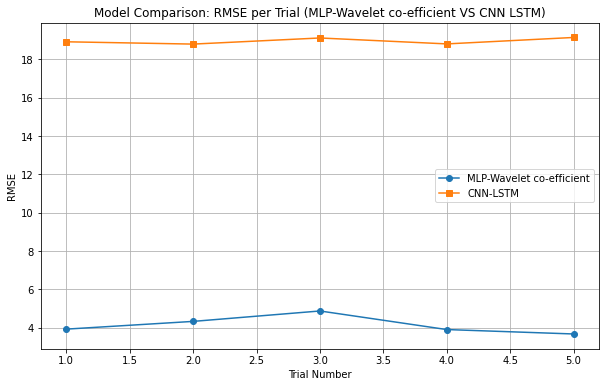

In [ ]:
trials = np.arange(1, len(rmse_scores_nn) + 1)

plt.figure(figsize=(10, 6))
plt.plot(trials, rmse_mlp, marker='o', label='MLP-Wavelet co-efficient')
plt.plot(trials, rmse_scores_nn, marker='s', label='CNN-LSTM')
plt.xlabel('Trial Number')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE per Trial (MLP-Wavelet co-efficient VS CNN LSTM)')
plt.legend()
plt.grid(True)
plt.show() 


### Covariance matrices

#### Ridge Regressor

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace


#data preparation
X_denoised, kept = denoise_emg_wavelet(
        data_X, wavelet='db8', level=5, thresh_rule='universal', mode='hard')

pipe_covariance_ridge = Pipeline([
    ('cov', Covariances(estimator='oas')),      # covariance 8×8
    ('ts',  TangentSpace(metric='riemann')),    # espace tangent → dim 36
    ('reg', Ridge(alpha=1))                    # Ridge regression
])

# data preprocessing
X_win_cov, Y_win_cov, groups = preprocess_emg_data_denoised(X_denoised, data_Y, stride = 250)

X = X_win_cov   
y = Y_win_cov            
g = groups                 
logo = LeaveOneGroupOut()


preds_per_fold = []     
idxs_per_fold  = []     
rmse_list      = []

# cross-validation
for fold, (train_idx, test_idx) in enumerate(logo.split(X, y, groups=g), start=1):
    print(f"\n--- Fold {fold} ---")
    X_tr, X_te = X[train_idx], X[test_idx]
    y_tr, y_te = y[train_idx], y[test_idx]

    # shape
    print(f"Train shape: {X_tr.shape}, y shape: {y_tr.shape}")
    
    # Training & Prediction
    pipe_covariance_ridge.fit(X_tr, y_tr)
    y_pred = pipe_covariance_ridge.predict(X_te)
    print(f"Pred shape: {y_pred.shape}")

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_te, y_pred))
    print(f"✅ Fold {fold} — RMSE: {rmse:.4f}")


    # Stockage
    preds_per_fold.append(y_pred)
    idxs_per_fold.append(test_idx)
    rmse_list.append(rmse)

# RMSE
print(f"\n▶️ RMSE moyen sur tous les folds : {np.mean(rmse_list):.4f}")

## checking predictions
for i, p in enumerate(preds_per_fold, start=1):
    print(f"Fold {i} predictions (shape {p.shape}):")
    print(p)           # affiche tout le tableau
    print("-" * 40)    # séparateur
print("Nombre de folds :", len(preds_per_fold))
for i, p in enumerate(preds_per_fold, start=1):
    print(f"Fold {i} contient {p.shape[0]} prédictions.")


--- Fold 1 ---
Train shape: (3676, 8, 500), y shape: (3676, 51)
Pred shape: (919, 51)
✅ Fold 1 — RMSE: 6.8246

--- Fold 2 ---
Train shape: (3676, 8, 500), y shape: (3676, 51)
Pred shape: (919, 51)
✅ Fold 2 — RMSE: 7.1677

--- Fold 3 ---
Train shape: (3676, 8, 500), y shape: (3676, 51)
Pred shape: (919, 51)
✅ Fold 3 — RMSE: 7.7782

--- Fold 4 ---
Train shape: (3676, 8, 500), y shape: (3676, 51)
Pred shape: (919, 51)
✅ Fold 4 — RMSE: 6.9792

--- Fold 5 ---
Train shape: (3676, 8, 500), y shape: (3676, 51)
Pred shape: (919, 51)
✅ Fold 5 — RMSE: 7.7529

▶️ RMSE moyen sur tous les folds : 7.3005
Fold 1 predictions (shape (919, 51)):
[[ 4.18398226e+01 -6.37924555e+01 -3.25108603e+01 ... -2.36964540e+00
  -4.25196999e+00 -6.40915503e+01]
 [ 4.08815249e+01 -6.34544379e+01 -2.97086748e+01 ... -1.30330543e+00
  -4.91890344e+00 -3.55372799e+01]
 [ 3.57531284e+01 -6.17816176e+01 -1.45650819e+01 ...  5.59620197e-02
  -5.81956199e+00  1.27128243e+00]
 ...
 [ 4.18822556e+01 -6.48352510e+01 -3.4006428

#### Random Forest Regressor 

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace

# Parameters to test
n_estimators_list = [200, 300, 400]

# Prepare data
X, y, groups = preprocess_emg_data_denoised(X_denoised, data_Y, stride=125)
logo = LeaveOneGroupOut()

best_score = np.inf
best_n = None
results = []

for n_est in n_estimators_list:
    print(f"\n=== Testing n_estimators = {n_est} ===")
    # Build pipeline
    pipe = Pipeline([
        ('cov', Covariances(estimator='oas')),
        ('ts',  TangentSpace(metric='riemann')),
        ('rf',  RandomForestRegressor(
            n_estimators=n_est,
            max_depth=None,
            random_state=42,
            n_jobs=-1
        ))
    ])

    rmse_folds = []

    # cross-validation
    for fold, (train_idx, test_idx) in enumerate(logo.split(X, y, groups=groups), start=1):
        X_tr, X_te = X[train_idx], X[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]

        pipe.fit(X_tr, y_tr)
        y_pred = pipe.predict(X_te)

        rmse = np.sqrt(mean_squared_error(y_te, y_pred))
        rmse_folds.append(rmse)

        # PRINT for each fold
        print(f" n_estimators={n_est} | Fold {fold}: RMSE = {rmse:.4f}")

    mean_rmse = np.mean(rmse_folds)
    print(f"→ Mean RMSE for n_estimators={n_est}: {mean_rmse:.4f}")

    results.append((n_est, mean_rmse))

    if mean_rmse < best_score:
        best_score = mean_rmse
        best_n = n_est

# Final summary
print("\n=== Overall results ===")
for n_est, rmse in results:
    print(f"  - n_estimators={n_est} → Mean RMSE = {rmse:.4f}")
print(f"\nBest setting: n_estimators = {best_n} with RMSE = {best_score:.4f}")


=== Testing n_estimators = 200 ===
 n_estimators=200 | Fold 1: RMSE = 4.0110
 n_estimators=200 | Fold 2: RMSE = 4.5676
 n_estimators=200 | Fold 3: RMSE = 5.2677
 n_estimators=200 | Fold 4: RMSE = 4.3065
 n_estimators=200 | Fold 5: RMSE = 4.4746
→ Mean RMSE for n_estimators=200: 4.5255

=== Testing n_estimators = 300 ===
 n_estimators=300 | Fold 1: RMSE = 4.0304
 n_estimators=300 | Fold 2: RMSE = 4.5461
 n_estimators=300 | Fold 3: RMSE = 5.2723
 n_estimators=300 | Fold 4: RMSE = 4.2963
 n_estimators=300 | Fold 5: RMSE = 4.4570
→ Mean RMSE for n_estimators=300: 4.5204

=== Testing n_estimators = 400 ===
 n_estimators=400 | Fold 1: RMSE = 4.0266
 n_estimators=400 | Fold 2: RMSE = 4.5220
 n_estimators=400 | Fold 3: RMSE = 5.2800
 n_estimators=400 | Fold 4: RMSE = 4.2796
 n_estimators=400 | Fold 5: RMSE = 4.4524
→ Mean RMSE for n_estimators=400: 4.5121

=== Overall results ===
  - n_estimators=200 → Mean RMSE = 4.5255
  - n_estimators=300 → Mean RMSE = 4.5204
  - n_estimators=400 → Mean RM

In [ ]:
import joblib
# Retrain on full dataset with best n_estimators 
print(f"\nTraining final RF with n_estimators={best_n} on the full dataset…")
final_pipe = Pipeline([
    ('cov', Covariances(estimator='oas')),
    ('ts',  TangentSpace(metric='riemann')),
    ('rf',  RandomForestRegressor(
        n_estimators=best_n,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

final_pipe.fit(X, y)
joblib.dump(final_pipe, "rf_full_riemann_rf.joblib")
print("✔️ Final model saved to rf_full_riemann_rf.joblib")



Training final RF with n_estimators=400 on the full dataset…
✔️ Final model saved to rf_full_riemann_rf.joblib


In [ ]:
final_pipe = joblib.load("rf_full_riemann_rf.joblib")

# reshape
data_X_test_merged = data_X_free.reshape(-1,8,500)
print(data_X_test_merged.shape)

X_test_win, _, _ = preprocess_emg_data_denoised(
    data_X_test,         
    np.zeros(len(data_X_test))
    stride=125
)

#Predict
y_pred_test = final_pipe.predict(X_test_win)
print(data_X_test_merged.shape)


"""
y_pred_free = np.vstack(preds)"""

(2700, 8, 500)
(2700, 8, 500)


NameError: name 'preds' is not defined

### Free Gestures

### CNN (LSTM)

In [ ]:
import torch.optim as optim
from sklearn.model_selection import GroupKFold, GroupShuffleSplit

# Set parameters
input_size = 8  # Number of features after feature extraction (this corresponds to your X shape)
hidden_size = 64  # Size of LSTM hidden state
output_size = 51  # Number of joint angles (output)
learning_rate = 0.001
batch_size = 64  # Batch size for training
cnn_out_channels = 32

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the LSTM model for regression
class LSTMModel(nn.Module):
    def __init__(self, input_size, cnn_out_channels, hidden_size, output_size):
        super(LSTMModel, self).__init__()
#         CNN block: 1D conv over feature dimension (input is [batch, seq_len, feature])
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels= cnn_out_channels, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        
        self.pool = nn.AdaptiveMaxPool1d(1)  # Reduce to 1 value per channel

        # LSTM block
        self.lstm = nn.LSTM(input_size=cnn_out_channels, hidden_size=hidden_size, batch_first=True)

        # Final regression head
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.conv1(x)       # -> [batch, cnn_out_channels, seq_len]
        x = self.relu(x)
        x = self.pool(x)        # -> [batch, cnn_out_channels, 1]
        x = x.squeeze(-1)       # -> [batch, cnn_out_channels]
        x = x.unsqueeze(1).repeat(1, 500, 1)  # -> [batch, seq_len, cnn_out_channels]

        # LSTM
        lstm_out, _ = self.lstm(x)  # -> [batch, 10, hidden_size]
        out = lstm_out[:, -1, :]    # Take last time step

        # Regression
        return self.fc(out)



In [ ]:
X_denoised_free, f_kept_free = denoise_emg_wavelet(
        data_X_free, wavelet='db4', level=3, thresh_rule='universal', mode='hard')

# preprocsesing
X_feat, y_next, groups = preprocess_emg_data_denoised(X_denoised_free, data_Y_free, window_size=500, stride=250)

val_preds_free = []
val_trues_free = []
rmse_scores_nn_free = []  # To store RMSE scores for each fold

logo = LeaveOneGroupOut()

for fold_idx, (train_idx, val_idx) in enumerate(logo.split(X_feat, y_next, groups=groups), start=1):
#     for train_idx, val_idx in logo.split(X_pca, y_processed, groups=groups):
    print(f"\n========== Fold {fold_idx}/{len(np.unique(groups))} ==========")
    X_train, X_val = X_feat[train_idx], X_feat[val_idx]
    y_train, y_val = y_next[train_idx],y_next[val_idx] 
    
#    convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
    
    # Loss function and optimizer
    model_nn_free = LSTMModel(input_size=input_size, cnn_out_channels= cnn_out_channels , hidden_size=hidden_size, output_size=output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_nn_free.parameters(), lr=learning_rate)

    # Training the model for each fold
    model_nn.train()  # Set model to training mode
    for epoch in range(100):  # Set the number of epochs

        optimizer.zero_grad()
        
        # Forward pass
        outputs = model_nn_free(X_train_tensor)
        
        # Compute loss
        loss = criterion(outputs, y_train_tensor)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()        

#         if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

    # Validation phase
    model_nn_free.eval()  # Set model to evaluation mode
    
    with torch.no_grad():
        val_outputs = model_nn_free(X_val_tensor)
        rmse = np.sqrt(mean_squared_error(y_val_tensor.numpy(), val_outputs.numpy()))
        rmse_scores_nn_free.append(rmse)
        print(f"Validation RMSE: {rmse:.3f}")
        
        # Save predictions and ground truth for this fold
        val_preds_free.append(val_outputs)
        val_trues_free.append(y_val)


# After all folds, concatenate the predictions and truths:
all_val_preds_free = np.concatenate(val_preds_free, axis=0)
all_val_trues_free = np.concatenate(val_trues_free, axis=0)

# Now you can calculate overall RMSE on all validation data:
overall_rmse_free = np.sqrt(mean_squared_error(all_val_trues_free, all_val_preds_free))
print(f"\nOverall Validation RMSE: {overall_rmse_free:.3f}")

#cross-validation results
print("\nRMSE for each fold:")
print(rmse_scores_nn_free)
print(f"Mean RMSE: {np.mean(rmse_scores_nn_free):.3f}")



========== Fold 1/5 ==========
Epoch [1/100], Loss: 684.6168
Epoch [2/100], Loss: 683.4773
Epoch [3/100], Loss: 682.3778
Epoch [4/100], Loss: 681.2810
Epoch [5/100], Loss: 680.1672
Epoch [6/100], Loss: 679.0183
Epoch [7/100], Loss: 677.8278
Epoch [8/100], Loss: 676.5897
Epoch [9/100], Loss: 675.2924
Epoch [10/100], Loss: 673.9211
Epoch [11/100], Loss: 672.4583
Epoch [12/100], Loss: 670.8898
Epoch [13/100], Loss: 669.2096
Epoch [14/100], Loss: 667.4152
Epoch [15/100], Loss: 665.5080
Epoch [16/100], Loss: 663.4929
Epoch [17/100], Loss: 661.3781
Epoch [18/100], Loss: 659.1699
Epoch [19/100], Loss: 656.8790
Epoch [20/100], Loss: 654.5195
Epoch [21/100], Loss: 652.1092
Epoch [22/100], Loss: 649.6727
Epoch [23/100], Loss: 647.2244
Epoch [24/100], Loss: 644.7704
Epoch [25/100], Loss: 642.3124
Epoch [26/100], Loss: 639.8502
Epoch [27/100], Loss: 637.3845
Epoch [28/100], Loss: 634.9158
Epoch [29/100], Loss: 632.4446
Epoch [30/100], Loss: 629.9697
Epoch [31/100], Loss: 627.4924
Epoch [32/100], 

Epoch [62/100], Loss: 540.9391
Epoch [63/100], Loss: 538.9535
Epoch [64/100], Loss: 536.9910
Epoch [65/100], Loss: 535.0507
Epoch [66/100], Loss: 533.1316
Epoch [67/100], Loss: 531.2327
Epoch [68/100], Loss: 529.3530
Epoch [69/100], Loss: 527.4920
Epoch [70/100], Loss: 525.6491
Epoch [71/100], Loss: 523.8235
Epoch [72/100], Loss: 522.0151
Epoch [73/100], Loss: 520.2232
Epoch [74/100], Loss: 518.4475
Epoch [75/100], Loss: 516.6877
Epoch [76/100], Loss: 514.9433
Epoch [77/100], Loss: 513.2142
Epoch [78/100], Loss: 511.4998
Epoch [79/100], Loss: 509.7999
Epoch [80/100], Loss: 508.1143
Epoch [81/100], Loss: 506.4426
Epoch [82/100], Loss: 504.7845
Epoch [83/100], Loss: 503.1398
Epoch [84/100], Loss: 501.5081
Epoch [85/100], Loss: 499.8893
Epoch [86/100], Loss: 498.2831
Epoch [87/100], Loss: 496.6891
Epoch [88/100], Loss: 495.1073
Epoch [89/100], Loss: 493.5373
Epoch [90/100], Loss: 491.9789
Epoch [91/100], Loss: 490.4319
Epoch [92/100], Loss: 488.8960
Epoch [93/100], Loss: 487.3711
Epoch [9

### MLP with Wavelet co-efficient

In [ ]:

import pywt
import itertools
from torch.utils.data import Dataset, Subset, DataLoader

#Dataset DWT + 3 temporal features
class DiscreteWaveletWithTimeFeatures(Dataset):
    def __init__(self, X_windows, y_windows, wavelet='db8', level=5):
        self.X = X_windows      # (n_samples, 8, 500)
        self.y = y_windows      # (n_samples, 51)
        self.wavelet = wavelet
        self.level = level

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]         # (8, 500)
        y = self.y[idx] if self.y is not None else None  # (51,)

        feats = []
        for chan in range(8):
            signal = x[chan]

           # DWT energies 
            coeffs = pywt.wavedec(signal, wavelet=self.wavelet, level=self.level)
            for sub in coeffs:
                feats.append(np.log(np.var(sub) + 1e-6))

            # Mean Absolute Value 
            mav = np.mean(np.abs(signal))
            feats.append(mav)

            # RMS 
            rms = np.sqrt(np.mean(signal**2))
            feats.append(rms)

            #  Zero Crossing Rate 
            zc = ((signal[:-1] * signal[1:]) < 0).sum() / (len(signal)-1)
            feats.append(zc)

        fv = np.array(feats, dtype=np.float32)  # length = 8*(n_coeffs + 3)
        return torch.from_numpy(fv), torch.from_numpy(y.astype(np.float32))


# MLP
class EMGMLP(nn.Module):
    def __init__(self, input_dim=72, hidden_dim=512, dropout=0.3, output_dim=51):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, output_dim)
        )

    def forward(self, x):
        return self.net(x)


#training and evaluation functions
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    for Xb, yb in loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(Xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * Xb.size(0)
    return total_loss / len(loader.dataset)

def eval_rmse(model, loader, device):
    model.eval()
    ys, ps = [], []
    with torch.no_grad():
        for Xb, yb in loader:
            Xb = Xb.to(device)
            p = model(Xb).cpu().numpy()
            ys.append(yb.numpy())
            ps.append(p)
    y_true = np.vstack(ys)
    y_pred = np.vstack(ps)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


#hyperparameter tuning with grid search
def grid_search_loso(X_win, y_win, groups, param_grid, epochs=50, batch_size=64, seed = 42):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    logo = LeaveOneGroupOut()
    best = {'rmse': np.inf}

    # Prepare the dataset and infer input_dim
    ds = DiscreteWaveletWithTimeFeatures(X_win, y_win)
    sample_feat, _ = ds[0]
    input_dim = sample_feat.shape[0]

    #Initialisation of list
    all_fold_preds = []  
    all_fold_trues = []  

    # grid search parameters
    for hidden_dim, dropout, lr in itertools.product(
        param_grid['hidden_dim'],
        param_grid['dropout'],
        param_grid['lr']
    ):
        print(f"\n👉 Testing hidden={hidden_dim}, dropout={dropout}, lr={lr}")
        rmse_folds = []

        for fold, (tr, te) in enumerate(logo.split(X_win, y_win, groups=groups), 1):
            train_loader = DataLoader(Subset(ds, tr), batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(Subset(ds, te), batch_size=batch_size, shuffle=False)

           # model initialization
            model = EMGMLP(input_dim=input_dim,
                           hidden_dim=hidden_dim,
                           dropout=dropout).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)
            criterion = nn.MSELoss()

           # traning
            for ep in range(epochs):
                loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
                print(f"    Fold {fold} — Epoch {ep+1}/{epochs} — Loss: {loss:.4f}")

             # Évaluation 
            model.eval()
            ys, ps = [], []
            with torch.no_grad():
                for Xb, yb in test_loader:
                    Xb = Xb.to(device)
                    out = model(Xb).cpu().numpy()
                    ps.append(out)
                    ys.append(yb.numpy())

            y_pred = np.vstack(ps)
            y_true = np.vstack(ys)

            all_fold_preds.append(y_pred)
            all_fold_trues.append(y_true)

            # RMSE calculation
            rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
            print(f"  Fold {fold} — RMSE: {rmse:.4f}")
            rmse_folds.append(rmse)

        mean_rmse = np.mean(rmse_folds)
        print(f"→ Mean RMSE = {mean_rmse:.4f}")
        if mean_rmse < best['rmse']:
            best.update({
                'rmse': mean_rmse,
                'hidden_dim': hidden_dim,
                'dropout': dropout,
                'lr': lr
            })

    print("\n🎯 **Best combination**:",
          f"hidden_dim={best['hidden_dim']},",
          f"dropout={best['dropout']},",
          f"lr={best['lr']} → RMSE={best['rmse']:.4f}")

    return best, all_fold_preds, all_fold_trues


# ------------------------------------------------------------
if __name__ == "__main__":
    # ppreprocessing the dataset
    X_denoised_free, f_kept_free = denoise_emg_wavelet(
        data_X_free, wavelet='db4', level=3, thresh_rule='universal', mode='hard')
    X_win, y_win, group_ids = preprocess_emg_data_denoised(X_denoised_free, data_Y_free, stride=125)

    param_grid = {
        'hidden_dim': [256],
        'dropout': [0.3],
        'lr': [1e-3]
    }

   # getting the best parameters
    best_params_free, all_fold_preds_free, all_fold_trues_free = grid_search_loso(
        X_win, y_win, group_ids,
        param_grid,
        epochs=20,
        batch_size=64
    )

    # example of the first 5 predictions of the first fold
    print("5 premières prédictions du fold 1 :", all_fold_preds_free[0][:5])

   # Contactenating all predictions
    all_preds_free = np.vstack(all_fold_preds_free)
    print("Shape de toutes les prédictions :", all_preds_free.shape)


👉 Testing hidden=256, dropout=0.3, lr=0.001
    Fold 1 — Epoch 1/20 — Loss: 226.0061
    Fold 1 — Epoch 2/20 — Loss: 123.5314
    Fold 1 — Epoch 3/20 — Loss: 116.5473
    Fold 1 — Epoch 4/20 — Loss: 112.8165
    Fold 1 — Epoch 5/20 — Loss: 108.5391
    Fold 1 — Epoch 6/20 — Loss: 106.1774
    Fold 1 — Epoch 7/20 — Loss: 103.8192
    Fold 1 — Epoch 8/20 — Loss: 100.8166
    Fold 1 — Epoch 9/20 — Loss: 99.1044
    Fold 1 — Epoch 10/20 — Loss: 97.3558
    Fold 1 — Epoch 11/20 — Loss: 94.8460
    Fold 1 — Epoch 12/20 — Loss: 94.1255
    Fold 1 — Epoch 13/20 — Loss: 93.0853
    Fold 1 — Epoch 14/20 — Loss: 91.3851
    Fold 1 — Epoch 15/20 — Loss: 89.4656
    Fold 1 — Epoch 16/20 — Loss: 89.5928
    Fold 1 — Epoch 17/20 — Loss: 87.9127
    Fold 1 — Epoch 18/20 — Loss: 86.7940
    Fold 1 — Epoch 19/20 — Loss: 86.2316
    Fold 1 — Epoch 20/20 — Loss: 85.3059
  Fold 1 — RMSE: 10.5416
    Fold 2 — Epoch 1/20 — Loss: 193.6532
    Fold 2 — Epoch 2/20 — Loss: 111.5126
    Fold 2 — Epoch 3/20 — Los

In [74]:
rmse_scores_mlp_free = [10.5416, 13.4893, 10.3108, 10.1780, 9.7280]
rmse_scores_mlp_free

[10.5416, 13.4893, 10.3108, 10.178, 9.728]

Now, train the MLP on the whole dataset to have the weight adapted

In [ ]:

print("\n🚀 Entraînement final sur tout le dataset...")

# Best parameters retrived
best_hidden = 128
best_dropout = 0.3
best_lr = 0.001

# dataset and full loader
full_dataset = DiscreteWaveletWithTimeFeatures(X_win, y_win)
full_loader  = DataLoader(full_dataset, batch_size=64, shuffle=True)

# model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_final_free = EMGMLP(input_dim=72, hidden_dim=best_hidden, dropout=best_dropout).to(device)
optimizer_final = torch.optim.Adam(model_final_free.parameters(), lr=best_lr)
criterion_final = nn.MSELoss()

# training
n_epochs = 50  # ou moins si tu veux juste consolider
for epoch in range(1, n_epochs+1):
    loss = train_one_epoch(model_final_free, full_loader, optimizer_final, criterion_final, device)
    print(f"Epoch {epoch}/{n_epochs} — Full train loss: {loss:.4f}")
torch.save(model_final_free.state_dict(), "emg_model_final_free_db8_denoised.pth")


🚀 Entraînement final sur tout le dataset...
Epoch 1/50 — Full train loss: 239.5457
Epoch 2/50 — Full train loss: 129.8159
Epoch 3/50 — Full train loss: 122.0126
Epoch 4/50 — Full train loss: 118.1812
Epoch 5/50 — Full train loss: 115.0152
Epoch 6/50 — Full train loss: 113.3915
Epoch 7/50 — Full train loss: 110.9718
Epoch 8/50 — Full train loss: 108.7792
Epoch 9/50 — Full train loss: 107.5287
Epoch 10/50 — Full train loss: 105.4602
Epoch 11/50 — Full train loss: 104.3303
Epoch 12/50 — Full train loss: 102.9971
Epoch 13/50 — Full train loss: 101.6576
Epoch 14/50 — Full train loss: 99.8287
Epoch 15/50 — Full train loss: 98.9568
Epoch 16/50 — Full train loss: 97.5076
Epoch 17/50 — Full train loss: 96.8084
Epoch 18/50 — Full train loss: 96.5265
Epoch 19/50 — Full train loss: 94.1199
Epoch 20/50 — Full train loss: 93.2812
Epoch 21/50 — Full train loss: 93.3071
Epoch 22/50 — Full train loss: 92.9885
Epoch 23/50 — Full train loss: 92.0865
Epoch 24/50 — Full train loss: 92.5955
Epoch 25/50 — F

#### 2.5.1 Predictions with MLP

In [ ]:

data_X_test_merged = data_X_free.reshape(-1,8,500)
print(data_X_test_merged.shape)
def extract_features_batch(X_windows, wavelet='db8', level=5):
    all_feats = []

    for window in X_windows:  # window : shape (8, 500)
        feats = []
        for chan in range(8):
            signal = window[chan]

            # DWT energy 
            coeffs = pywt.wavedec(signal, wavelet=wavelet, level=level)
            feats.extend([np.log(np.var(c) + 1e-6) for c in coeffs])

            # MAV, RMS, ZC
            mav = np.mean(np.abs(signal))
            rms = np.sqrt(np.mean(signal**2))
            zc = ((signal[:-1] * signal[1:]) < 0).sum() / (len(signal)-1)

            feats.extend([mav, rms, zc])

        all_feats.append(feats)

    return np.array(all_feats, dtype=np.float32)  # shape (n_samples, 72)
# extract features 
X_feat = extract_features_batch(data_X_test_merged, wavelet='db8', level=5)

# model initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EMGMLP(input_dim=72, hidden_dim=128, dropout=0.3).to(device)
model.load_state_dict(torch.load("emg_model_final_free_db8_denoised.pth"))
model.eval()

# tensor conversion
X_tensor = torch.from_numpy(X_feat).to(device)

# prediction par batch
batch_size = 64
preds = []
with torch.no_grad():
    for i in range(0, len(X_tensor), batch_size):
        xb = X_tensor[i:i+batch_size]
        out = model(xb).cpu().numpy()
        preds.append(out)

y_pred_free = np.vstack(preds)

(2700, 8, 500)


/var/folders/wj/fxlzyhvj6vbcslcq88wj0vf40000gn/T/ipykernel_90532/3443300530.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("emg_model_

In [63]:
y_pred_free

array([[ 134.51855  , -248.40512  ,  -37.247612 , ...,    3.1492662,
         -20.31442  ,   35.46085  ],
       [ 150.18965  , -272.06454  ,  -64.89752  , ...,    2.2812939,
         -20.60685  ,   13.041639 ],
       [ 250.64287  , -454.78986  , -119.381424 , ...,    3.0006804,
         -32.58769  ,   -3.3141513],
       ...,
       [ 135.36134  , -259.8021   ,  -16.913721 , ...,    4.0112762,
         -23.742922 ,   60.337765 ],
       [ 236.94063  , -444.85718  ,  -60.398357 , ...,   -0.847026 ,
         -31.24638  ,  -36.967987 ],
       [ 240.0019   , -404.0996   , -161.59502  , ...,   -0.8245373,
         -26.453537 ,  -69.46518  ]], dtype=float32)

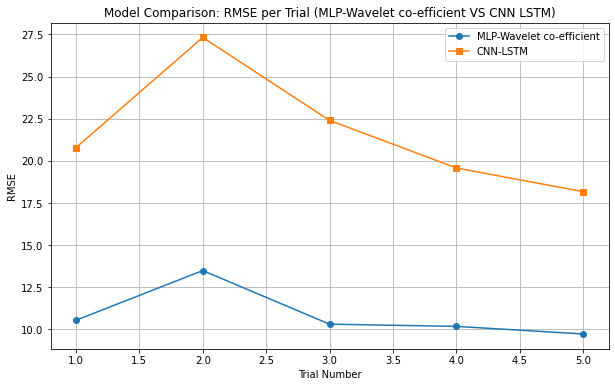

In [75]:
trials = np.arange(1, len(rmse_scores_nn_free) + 1)

plt.figure(figsize=(10, 6))
plt.plot(trials, rmse_scores_mlp_free, marker='o', label='MLP-Wavelet co-efficient')
plt.plot(trials, rmse_scores_nn_free, marker='s', label='CNN-LSTM')
plt.xlabel('Trial Number')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE per Trial (MLP-Wavelet co-efficient VS CNN LSTM)')
plt.legend()
plt.grid(True)
plt.show()

* results are discussed in the discusion section of this part

### Covariance matrices

#### Ridge Regressor 

In [ ]:
X_denoised_free, f_kept_free = denoise_emg_wavelet(
        data_X_free, wavelet='db8', level=5, thresh_rule='universal', mode='hard')
# Pipeline
pipe_covariance_ridge_free = Pipeline([
    ('cov', Covariances(estimator='oas')),
    ('ts',  TangentSpace(metric='riemann')),
    ('reg', Ridge(alpha=1.0))
])
X_processed_denoised_free, Y_processed_free, groups = preprocess_emg_data_denoised(X_denoised_free, data_Y_free, stride = 125)
# cross validation
logo = LeaveOneGroupOut()
preds_per_fold_free = []   # ← pour stocker y_pred de chaque fold
rmse_list = []

# cross-validation
for fold, (train_idx, test_idx) in enumerate(
    logo.split(X_processed_denoised_free, Y_processed_free, groups=groups), start=1
):
    print(f"\n--- Fold {fold} ---")
    X_train = X_processed_denoised_free[train_idx]
    y_train = Y_processed_free[train_idx]
    X_val   = X_processed_denoised_free[test_idx]
    y_val   = Y_processed_free[test_idx]

    # Training and prediction
    pipe_covariance_ridge_free.fit(X_train, y_train)
    y_pred = pipe_covariance_ridge_free.predict(X_val)
    print(f"Pred shape: {y_pred.shape}")

   # calculation RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"✅ Fold {fold} — RMSE: {rmse:.4f}")

   # store the predictions
    preds_per_fold_free.append(y_pred)
    rmse_list.append(rmse)

# 4) Résumé
print(f"\n▶️ RMSE moyen sur tous les folds : {np.mean(rmse_list):.4f}")
print(f"Nombre de folds stockés : {len(preds_per_fold_free)}")
for i, p in enumerate(preds_per_fold_free, start=1):
    print(f" Fold {i}: {p.shape[0]} prédictions (shape {p.shape})")


--- Fold 1 ---
Pred shape: (2157, 51)
✅ Fold 1 — RMSE: 10.7488

--- Fold 2 ---
Pred shape: (2157, 51)
✅ Fold 2 — RMSE: 13.0246

--- Fold 3 ---
Pred shape: (2157, 51)
✅ Fold 3 — RMSE: 11.3992

--- Fold 4 ---
Pred shape: (2157, 51)
✅ Fold 4 — RMSE: 10.3978

--- Fold 5 ---
Pred shape: (2157, 51)
✅ Fold 5 — RMSE: 9.1904

▶️ RMSE moyen sur tous les folds : 10.9521
Nombre de folds stockés : 5
 Fold 1: 2157 prédictions (shape (2157, 51))
 Fold 2: 2157 prédictions (shape (2157, 51))
 Fold 3: 2157 prédictions (shape (2157, 51))
 Fold 4: 2157 prédictions (shape (2157, 51))
 Fold 5: 2157 prédictions (shape (2157, 51))


#### Random Forest Regressor

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace

# Parameters to test
n_estimators_list = [400]

# Prepare data
X, y, groups = preprocess_emg_data_denoised(X_denoised_free, data_Y_free, stride=125)
logo = LeaveOneGroupOut()

best_score = np.inf
best_n = None
results = []

for n_est in n_estimators_list:
    print(f"\n=== Testing n_estimators = {n_est} ===")
    # Build pipeline
    pipe = Pipeline([
        ('cov', Covariances(estimator='oas')),
        ('ts',  TangentSpace(metric='riemann')),
        ('rf',  RandomForestRegressor(
            n_estimators=n_est,
            max_depth=None,
            random_state=42,
            n_jobs=-1
        ))
    ])

    rmse_folds = []

   # Cross-validation
    for fold, (train_idx, test_idx) in enumerate(logo.split(X, y, groups=groups), start=1):
        X_tr, X_te = X[train_idx], X[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]

        pipe.fit(X_tr, y_tr)
        y_pred = pipe.predict(X_te)

        rmse = np.sqrt(mean_squared_error(y_te, y_pred))
        rmse_folds.append(rmse)

        # PRINT for each fold
        print(f" n_estimators={n_est} | Fold {fold}: RMSE = {rmse:.4f}")

    mean_rmse = np.mean(rmse_folds)
    print(f"→ Mean RMSE for n_estimators={n_est}: {mean_rmse:.4f}")

    results.append((n_est, mean_rmse))

    if mean_rmse < best_score:
        best_score = mean_rmse
        best_n = n_est

# Final summary
print("\n=== Overall results ===")
for n_est, rmse in results:
    print(f"  - n_estimators={n_est} → Mean RMSE = {rmse:.4f}")
print(f"\nBest setting: n_estimators = {best_n} with RMSE = {best_score:.4f}")


=== Testing n_estimators = 400 ===
 n_estimators=400 | Fold 1: RMSE = 10.0265
 n_estimators=400 | Fold 2: RMSE = 13.2484
 n_estimators=400 | Fold 3: RMSE = 10.9350
 n_estimators=400 | Fold 4: RMSE = 9.6494
 n_estimators=400 | Fold 5: RMSE = 9.5005
→ Mean RMSE for n_estimators=400: 10.6720

=== Overall results ===
  - n_estimators=400 → Mean RMSE = 10.6720

Best setting: n_estimators = 400 with RMSE = 10.6720


### [Discussions on the Neural Network Based Approaches for Both Guided Gestures and Free Gestures](#discussion-nn)

### Comparative Results: CNN‑LSTM vs  MLP with Wavelet co-efficient

| Dataset       | Model                                   | Mean RMSE  |
|---------------|-----------------------------------------|------------|
| **Guided**    | CNN‑LSTM                                | 18.95      |
| **Guided**    | MLP with Wavelet co-efficient                   | 4.15       |
| **Free**      | CNN‑LSTM                                | 21.65      |
| **Free**      | MLP with Wavelet co-efficient                   | 10.85      |

---

### Discussion 


1. **features win hands‑down.**
    - The simple MLP built on wavelet variances plus MAV, RMS and zero‑crossing captures almost everything it needs, especially for the guided gestures. An RMSE of about 4 feels really tight compared to nearly 19 with the CNN‑LSTM.

2. **Pooling was too brutal.** 
    - By collapsing each 500‑sample window to a single number per channel, the CNN‑LSTM never really sees how the signal evolves over time. It’s like trying to judge a movie by one frame; you lose all the action.  
    
3. **Free gestures are tougher.**
   - Even with our feature‑rich MLP the error doubles (≈ 10.8) compared to guided movements. That makes sense—when people move however they want, the patterns get messy. The CNN‑LSTM suffers even more (≈ 21.6) because it’s already starved of temporal cues.

---
In short, good old‑fashioned domain knowledge plus a small MLP beat a naïve CNN‑LSTM here. We can keep improving the deep model by letting it look at the full story in every window.  








# 

## [Ensemble Strategies](#Ensemble-Strategies)

### Guided Gestures

In this approach, we first collect predictions from our base learners (Random Forest and MLP) for each EMG window. These predictions are horizontally concatenated to form a new “meta‑feature” matrix, while the true joint‑angle labels—processed with the same windowing—serve as the target. We then train a Ridge regression (wrapped in `MultiOutputRegressor`) on these meta‑features using Leave‑One‑Group‑Out cross‑validation, that is, we reorganize folds in the same fashion as for the windows i.e., each prediction is associated with a group session number, ensuring again no leakage across trials. Finally, each base model is retrained on the full dataset to produce our final ensemble, which learns to correct systematic errors of the base models and typically yields lower RMSE than any single model alone.  


### Comparasion on the ensemble’s regression performance against each of its constituent base models

#### Meta Ensembler

##### Ridge

In [ ]:

import joblib
oof_rf = np.load("rf_oof_guided.npy", allow_pickle=True)
oof_mlp = np.array(all_preds_mlp_guided)

# data preprocessing
X_meta_preprossed, y_true_preprocessed, groups = preprocess_emg_data_denoised(
    X_denoised, data_Y, stride=125
)

# concaténation of models
oof_list = [oof_rf, oof_mlp]

X_meta = np.hstack(oof_list)  
y_meta = y_true_preprocessed  

# cross-validation
logo = LeaveOneGroupOut()
rmses = []

for fold, (tr_idx, te_idx) in enumerate(logo.split(X_meta, y_meta, groups=groups), start=1):
    X_tr, X_te = X_meta[tr_idx], X_meta[te_idx]
    y_tr, y_te = y_meta[tr_idx], y_meta[te_idx]

    meta = MultiOutputRegressor(Ridge(alpha=1.0, solver='svd'))
    meta.fit(X_tr, y_tr)

    y_pred = meta.predict(X_te)
    rmse = np.sqrt(mean_squared_error(y_te, y_pred))
    print(f"Fold {fold} — groupes {np.unique(groups[te_idx])}: RMSE = {rmse:.4f}")
    rmses.append(rmse)

print("\n→ RMSE par fold :", np.round(rmses, 4))
print("→ RMSE moyen    :", np.round(np.mean(rmses), 4))

# training and saving
meta_final = MultiOutputRegressor(Ridge(alpha=1.0, solver='svd'))
meta_final.fit(X_meta, y_meta)
joblib.dump(meta_final, "meta_ridge_full.joblib")
print("\nMéta‐modèlesaved and trained  'meta_ridge_full.joblib'")

# Extract final Ridge weights per base model 
coefs = np.array([
    est.coef_  
    for est in meta_final.estimators_
])            

Fold 1 — groupes [0]: RMSE = 3.9690
Fold 2 — groupes [1]: RMSE = 4.3925
Fold 3 — groupes [2]: RMSE = 5.2288
Fold 4 — groupes [3]: RMSE = 4.3089
Fold 5 — groupes [4]: RMSE = 3.7258

→ RMSE par fold : [3.969  4.3925 5.2288 4.3089 3.7258]
→ RMSE moyen    : 4.325

Méta‐modèlesaved and trained  'meta_ridge_full.joblib'


##### Random Forest

In [ ]:

# contatenation of models
X_meta = np.stack([oof_rf, oof_mlp], axis=1)  
# shape 
n_samples, n_models, n_out = X_meta.shape
X_meta = X_meta.reshape(n_samples, n_models * n_out)

# cross-validation
logo = LeaveOneGroupOut()
rmses = []

for fold, (tr_idx, te_idx) in enumerate(logo.split(X_meta, y_meta, groups), start=1):
    # Split dataset
    X_tr_meta, X_te_meta = X_meta[tr_idx], X_meta[te_idx]
    y_tr_meta, y_te_meta = y_meta[tr_idx], y_meta[te_idx]

   # model initialization
    meta_rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    meta_rf.fit(X_tr_meta, y_tr_meta)

    # Prédiction
    y_pred_meta = meta_rf.predict(X_te_meta)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_te_meta, y_pred_meta))
    print(f"Fold {fold}: Meta-RF RMSE = {rmse:.4f}")
    rmses.append(rmse)

print(f"\nEnsemble LOSO RMSE moyen: {np.mean(rmses):.4f} ± {np.std(rmses):.4f}")


RF preds shape : (9185, 51)
MLP preds shape: (9185, 51)
y_true shape   : (9185, 51)
groups shape   : (9185,)
Fold 1: Meta-RF RMSE = 3.7625
Fold 2: Meta-RF RMSE = 4.1933
Fold 3: Meta-RF RMSE = 4.6520
Fold 4: Meta-RF RMSE = 3.6866
Fold 5: Meta-RF RMSE = 3.6079

Ensemble LOSO RMSE moyen: 3.9804 ± 0.3922


#### Average Ensembler

In [ ]:


# concatenation of models
oof_list_free = [oof_mlp, oof_rf]

logo = LeaveOneGroupOut()
rmses = []
X_meta_preprossed, y_true_preprocessed, groups = preprocess_emg_data_denoised(
    X_denoised, data_Y, stride=125
)
y_meta  = y_true_preprocessed

for fold, (tr_idx, te_idx) in enumerate(logo.split(oof_rf, y_meta, groups=groups), start=1):
     # Selection of OOF predictions for this fold
    rf_fold = oof_rf[te_idx]
    mlp_fold = oof_mlp[te_idx]
   
    y_fold  = y_true_preprocessed[te_idx]

   # ensemble predictions
    pred_ensemble = (rf_fold + mlp_fold  ) / 2
    
    rmse = np.sqrt(mean_squared_error(y_fold, pred_ensemble))
    print(f"Fold {fold}: Ensemble RMSE = {rmse:.4f}")
    rmses.append(rmse)

print(f"\nEnsemble LOSO RMSE moyen: {np.mean(rmses):.4f} ± {np.std(rmses):.4f}")

Fold 1: Ensemble RMSE = 3.5036
Fold 2: Ensemble RMSE = 3.8372
Fold 3: Ensemble RMSE = 4.6987
Fold 4: Ensemble RMSE = 3.5165
Fold 5: Ensemble RMSE = 3.4806

Ensemble LOSO RMSE moyen: 3.8073 ± 0.4645


### Synthesis 

In [ ]:
oof_mlp  
oof_rf 


X_den, y_true, groups = preprocess_emg_data_denoised(
    X_denoised, data_Y, stride=125
)


X_meta = np.hstack([oof_rf, oof_mlp])  # → (n_samples, 2 * n_outputs)


logo = LeaveOneGroupOut()

rmse_rf   = []
rmse_mlp  = []
rmse_meta = []

for fold, (train_idx, test_idx) in enumerate(
        logo.split(X_meta, y_true, groups), start=1):

    # true targets for this fold
    y_te = y_true[test_idx]

    # base-model RMSEs (we already have their OOF preds)
    rmse_rf.append( np.sqrt(mean_squared_error(y_te, oof_rf[test_idx])) )
    rmse_mlp.append(np.sqrt(mean_squared_error(y_te, oof_mlp[test_idx])))

    # train meta-Ridge on all other samples, predict on this fold
    meta = MultiOutputRegressor(Ridge(alpha=1.0, solver='svd'))
    meta.fit(X_meta[train_idx], y_true[train_idx])
    y_pred_meta = meta.predict(X_meta[test_idx])
    rmse_meta.append(np.sqrt(mean_squared_error(y_te, y_pred_meta)))

    print(f"Fold {fold:2d} → RF: {rmse_rf[-1]:.3f}, MLP: {rmse_mlp[-1]:.3f}, Meta-Ridge: {rmse_meta[-1]:.3f}")



print("\nAverage RMSE ± std:")
print(f" • RF         : {np.mean(rmse_rf):.3f} ± {np.std(rmse_rf):.3f}")
print(f" • MLP        : {np.mean(rmse_mlp):.3f} ± {np.std(rmse_mlp):.3f}")
print(f" • Meta-Ridge : {np.mean(rmse_meta):.3f} ± {np.std(rmse_meta):.3f}")

Fold  1 → RF: 4.140, MLP: 3.971, Meta-Ridge: 3.969
Fold  2 → RF: 3.826, MLP: 4.605, Meta-Ridge: 4.392
Fold  3 → RF: 5.136, MLP: 4.938, Meta-Ridge: 5.229
Fold  4 → RF: 3.672, MLP: 3.973, Meta-Ridge: 4.309
Fold  5 → RF: 3.867, MLP: 3.928, Meta-Ridge: 3.726

Average RMSE ± std:
 • RF         : 4.128 ± 0.526
 • MLP        : 4.283 ± 0.413
 • Meta-Ridge : 4.325 ± 0.511


## Discussion 

1. **Meta Ensembler**  
   **(i) Ridge**  
   - The ridge meta‐model works, but its RMSE doesn’t beat the best base learners (e.g. wavelet-MLP, RF).  
   - When a session is “easy” or “hard” for the base models (low or high RMSE), it stays that way e.g., meta—Session 3  

   **(ii) Random Forest**  
   - Switching to a RF meta gives a small RMSE improvement over ridge and over the base models on average.  
   - Again, easy/hard sessions remain correlated: the best base-model sessions stay the best here, and vice versa  

2. **Mean Ensembler**  
   - Simply averaging OOF predictions yields the lowest RMSE of all methods, session by session
   - Its simplicity seems to prevent over- or under-weighting any model, giving a more stable result.  

3. **Takeaways**  
   - Our meta-learners struggle to consistently out-perform the best base model—finding optimal weights for each session is tough.  
   - We believe that the good results of the Mean-Ensembler are due to the simple mean, which is statiscally robust since it treats each model as equally relevant avoiding overfitting some pattern   


##  Contribution of each base model

We will evaluate the contribution of each model w.r.t  Ridge regression, since (i) it is way more faster and (ii) following what has been discussed in the Discussion section, any of the Meta-regressor (Ridge, Random Forest) has RMSE proportional w.r.t base models. 


In [92]:


n_out = coefs.shape[0]
n_feat = coefs.shape[1]      

# split into RF vs MLP blocks, then average over all outputs & features
rf_block  = coefs[:, : n_feat//2]  
mlp_block = coefs[:, n_feat//2 :]   
w_rf  = rf_block.mean()             
w_mlp = mlp_block.mean()

print(f"→ Final meta‐Ridge average weight on RF preds : {w_rf:.3f}")
print(f"→ Final meta‐Ridge average weight on MLP preds: {w_mlp:.3f}")
w_rf, w_mlp = 0.032, 0.040
total = w_rf + w_mlp
print("RF  contrib:", w_rf/total )
print("MLP contrib:", w_mlp/total) 

→ Final meta‐Ridge average weight on RF preds : 0.032
→ Final meta‐Ridge average weight on MLP preds: 0.040
RF  contrib: 0.4444444444444444
MLP contrib: 0.5555555555555555


## [Bias–Variance Trade-Off Analysis](#bias)

- **Bias (Mean RMSE):**  
  - **RF**: 4.28  
  - **MLP**: 4.13  
  - **Meta-Ridge**: 4.33  
  The meta-Ridge’s mean RMSE exceeds the best base (MLP), so it exhibits **higher bias** than MLP alone.

- **Variance (RMSE spread across folds):**  
  - **RF** std ≈ 0.53  
  - **MLP** std ≈ 0.41  
  - **Meta-Ridge** std ≈ 0.51  
  Meta-Ridge does not significantly reduce RMSE variability compared to RF but exceeds dramatically the  MLP variability.

---

### Interpretation

- **Unfavorable trade-off:** by fitting a Ridge combiner, we **increased bias** (mean RMSE rose above 4.13) without a meaningful drop in variance.   
- **Takeaway:** for this task, the single best base model (MLP) remains superior to the meta-learner.  


### Relative Contributions of Base Models

- **Base model performance (mean RMSE):**
  - Random Forest: **4.28**  
  - MLP          : **4.13**
- **Meta-Ridge weights (normalized):**
  - RF  → 44%  
  - MLP → 56%  

Because the MLP had the  slightly lower mean RMSE, it is not surprising that Ridge leans on it a bit more—about 56% of the final prediction


### Free Gestures

#### Meta Ensembler

##### Ridge

In [ ]:

import joblib
rf_oof_free = np.load("rf_oof_free.npy")
oof_mlp_free = np.load("oof_wlp_free,.npy")

# preprocessing the dataset
X_meta_preprocessed_free, y_meta_preprocessed_free, groups_free = preprocess_emg_data_denoised(
    X_denoised_free, data_Y_free, stride=125
)
print("Préprocessed shapes:", X_meta_preprocessed_free.shape, y_meta_preprocessed_free.shape, groups_free.shape)

# concatenation of models

oof_list_free = [oof_mlp_free, rf_oof_free]


X_meta_free = np.hstack(oof_list_free)     # shape = (n_samples, n_models * n_outputs)
y_meta_free = y_meta_preprocessed_free     # shape = (n_samples, n_outputs)

# cross-validation
logo_free = LeaveOneGroupOut()
rmses_free_en = []

for fold_free, (tr_idx_free, te_idx_free) in enumerate(
        logo_free.split(X_meta_free, y_meta_free, groups=groups_free), start=1):
    X_tr_free, X_te_free = X_meta_free[tr_idx_free], X_meta_free[te_idx_free]
    y_tr_free, y_te_free = y_meta_free[tr_idx_free], y_meta_free[te_idx_free]

    meta_free = MultiOutputRegressor(Ridge(alpha=1.0, solver='svd'))
    meta_free.fit(X_tr_free, y_tr_free)

    y_pred_free = meta_free.predict(X_te_free)
    rmse_free = np.sqrt(mean_squared_error(y_te_free, y_pred_free))
    print(f"Fold {fold_free} — groupes {np.unique(groups_free[te_idx_free])}: RMSE_free = {rmse_free:.4f}")
    rmses_free_en.append(rmse_free)

print("\n→ RMSE_free par fold :", np.round(rmses_free_en, 4))
print("→ RMSE_free moyen    :", np.round(np.mean(rmses_free_en), 4))

# training and saving
meta_final_free = MultiOutputRegressor(Ridge(alpha=1.0, solver='svd'))
meta_final_free.fit(X_meta_free, y_meta_free)
joblib.dump(meta_final_free, "meta_ridge_full_free.joblib")
print("\nMéta-modèle_free entraîné sur tout le jeu et sauvegardé sous 'meta_ridge_full_free.joblib'")

Préprocessed shapes: (10785, 8, 500) (10785, 51) (10785,)
Fold 1 — groupes [0]: RMSE_free = 12.1380
Fold 2 — groupes [1]: RMSE_free = 14.5192
Fold 3 — groupes [2]: RMSE_free = 11.5438
Fold 4 — groupes [3]: RMSE_free = 14.2923
Fold 5 — groupes [4]: RMSE_free = 10.5546

→ RMSE_free par fold : [12.138  14.5192 11.5438 14.2923 10.5546]
→ RMSE_free moyen    : 12.6096

Méta-modèle_free entraîné sur tout le jeu et sauvegardé sous 'meta_ridge_full_free.joblib'


##### Random Forest 

In [ ]:

print("RF preds shape :", rf_oof_free.shape)
print("MLP preds shape:", oof_mlp_free.shape)
print("y_true shape   :", y_meta_free.shape)
print("groups shape   :", groups_free.shape)

# model concatenation
X_meta_free = np.stack([rf_oof_free, oof_mlp_free], axis=1)  
# shape 
n_samples, n_models, n_out = X_meta_free.shape
X_meta_free = X_meta_free.reshape(n_samples, n_models * n_out)

# cross-validation
logo = LeaveOneGroupOut()
rmses = []

for fold, (tr_idx, te_idx) in enumerate(logo.split(X_meta, y_meta, groups), start=1):
     # Split dataset
    X_tr_meta, X_te_meta = X_meta_free[tr_idx], X_meta_free[te_idx]
    y_tr_meta, y_te_meta = y_meta_free[tr_idx], y_meta_free[te_idx]

    # model initialization
    meta_rf = RandomForestRegressor(
        n_estimators=400,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    meta_rf.fit(X_tr_meta, y_tr_meta)

    # Prédiction
    y_pred_meta = meta_rf.predict(X_te_meta)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_te_meta, y_pred_meta))
    print(f"Fold {fold}: Meta-RF RMSE = {rmse:.4f}")
    rmses.append(rmse)

print(f"\nEnsemble LOSO RMSE moyen: {np.mean(rmses):.4f} ± {np.std(rmses):.4f}")

RF preds shape : (10785, 51)
MLP preds shape: (10785, 51)
y_true shape   : (10785, 51)
groups shape   : (10785,)
Fold 1: Meta-RF RMSE = 10.9623
Fold 2: Meta-RF RMSE = 12.2004
Fold 3: Meta-RF RMSE = 9.9787
Fold 4: Meta-RF RMSE = 10.0180
Fold 5: Meta-RF RMSE = 9.8681

Ensemble LOSO RMSE moyen: 10.6055 ± 0.8891


#### Average Ensembler

In [ ]:


testpred = [oof_mlp_free, rf_oof_free]

oof_list_free =  [oof_mlp_free, rf_oof_free, pipe_covariance_ridge_free]


# cross-validation
logo = LeaveOneGroupOut()
rmses_free_avg = []

for fold, (tr_idx, te_idx) in enumerate(logo.split(rf_oof_free, y_meta_free, groups=groups_free), start=1):
    # selection of OOF predictions for this fold
    rf_fold = rf_oof_free[te_idx]
    mlp_fold = oof_mlp_free[te_idx]
    
    #cov_fold = all_preds_pipeline_cov_free[te_idx]
    y_fold  = Y_processed_free[te_idx]

    # compute ensemble predictions
    pred_ensemble = (rf_fold + mlp_fold ) / 2
    
    rmse = np.sqrt(mean_squared_error(y_fold, pred_ensemble))
    print(f"Fold {fold}: Ensemble RMSE = {rmse:.4f}")
    rmses_free_avg.append(rmse)

print(f"\nEnsemble LOSO RMSE moyen: {np.mean(rmses_free_avg):.4f} ± {np.std(rmses_free_avg):.4f}")

Fold 1: Ensemble RMSE = 10.7403
Fold 2: Ensemble RMSE = 13.2506
Fold 3: Ensemble RMSE = 10.0344
Fold 4: Ensemble RMSE = 8.6478
Fold 5: Ensemble RMSE = 8.6371

Ensemble LOSO RMSE moyen: 10.2620 ± 1.7005


# Discussion 

1. **Meta Ensembler**  
   **(i) Ridge**  
   - Unlike before, the ridge meta-model no longer outperforms the best base learners—in some cases it even underperforms.  
**(ii) Random Forest**  
   - The RF meta-model also fails to deliver a clear gain over the individual base models except for the two last sessions, however, all models tend ot perform better on these sessions, therefore it is not significant.

2. **Mean Ensembler**  
   - As with our original data, taking a simple average of OOF predictions still yields the lowest RMSE per fold  
   - Its statistical robustness remains: by treating each model equally, it avoids overfitting to any one pattern

3. **Takeaways**  
   - Meta-learners struggle again to beat the strongest base models when optimal weights vary by session.  
   - The mean ensemble stands out as the go-to approach—its simplicity and equal weighting keep it consistently strong.  


### [Link to the visualization video](#visualization)

In [1]:
# This this the hand visualization of the predicted values for the guided test data set  
# The two hands are the same, since we don't have the real values. 

"https://www.youtube.com/watch?v=4Hr8aU_lLq4&ab_channel=ihsaansiddiqui"

'https://www.youtube.com/watch?v=4Hr8aU_lLq4&ab_channel=ihsaansiddiqui'